# Processing SBE data with pIMOS

This parses straight from raw files to Process Level 1 - i.e. skips process level 0.

Included instruments:
- SBE56
- SBE39 T
- SBE39 TP
- SBE37 CTD 
- Our very special friend, SBE37 4567 CT
- Wetlabs
- Signature
- Vector
- TRDI ADCPS


In [3]:
import zutils.file as zfile

import pIMOS.xrwrap.seabird_37_39_56 as seabird_37_39_56
import pIMOS.xrwrap.wetlabs_ntu as wetlabs_ntu
import pIMOS.xrwrap.nortek_signature as nortek_signature
import pIMOS.xrwrap.nortek_vector as nortek_vector #, num2date_lk

import pIMOS.utils.UWA_archive_utils as ai

import os
import matplotlib.pyplot as plt
import datetime
import numpy as np 
import pandas as pd
import glob

import pIMOS.utils.quality_control as pqc
import importlib

# O Drive is //drive.irds.uwa.edu.au/CEME-BBL-001
# pIMOS_export_dir = r'O:\Data\pIMOS\KISSME'

project_root = r'G:\Experiments\kissme17'
project_root = r'E:\Experiments\kissme17'

archive_dir = os.path.join(project_root, 'archive_FV01') 
dbconfig_file = os.path.join('./', 'database', 'config.txt') 

if not os.path.exists(archive_dir):
    os.mkdir(archive_dir)
    
db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
db_config
db_data


deployment_metadata = pIMOS_KISSME_Instruments.csv

ctd_log = pIMOS_KISSME2017_CTD_Logbook.csv

possible_mooring_dates = pIMOS_possible_mooring_dates.csv
deployment_metadata = pIMOS_KISSME_Instruments.csv

ctd_log = pIMOS_KISSME2017_CTD_Logbook.csv

possible_mooring_dates = pIMOS_possible_mooring_dates.csv


{'deployment_metadata':         Project StationID Trip Recovered  Longitude  Latitude  Depth TimeZone  \
 0      IMOS NWS    BRB200            NaN   123.0459  -14.2426   -200      UTC   
 1      IMOS NWS    BRB200            NaN   123.0459  -14.2426   -200      UTC   
 2      IMOS NWS    BRB200            NaN   123.0459  -14.2426   -200      UTC   
 3      IMOS NWS    BRB200            NaN   123.0459  -14.2426   -200      UTC   
 4      IMOS NWS    BRB200            NaN   123.0459  -14.2426   -200      UTC   
 ..          ...       ...            ...        ...       ...    ...      ...   
 126  KISSME2017     WP250     KISSME_REC   123.3490  -13.7659   -252      UTC   
 127  KISSME2017     WP250     KISSME_REC   123.3490  -13.7659   -252      UTC   
 128  KISSME2017     WP250     KISSME_REC   123.3490  -13.7659   -252      UTC   
 129  KISSME2017     WP250     KISSME_REC   123.3490  -13.7659   -252      UTC   
 130  KISSME2017     WP250     KISSME_REC   123.3490  -13.7659   -252      

# Loop through all now using the spreadsheet

# Now the Wetlabs

### Start with the SEABIRD data files that load from ascs

Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Project                 KISSME2017
StationID                    NP250
Trip Recovered          KISSME_REC
Longitude                 123.3535
Latitude                  -13.7621
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -237.32
FileName              67761705.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      6776
InstrumentHeight             14.68
DeploymentHeight             14.68
Orientation                    NaN
SidelobeInt                    NaN
Name: 25, dtype: object
E:\Experiments\kissme17\Data\SBE39\67761705.asc
File exists
a

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


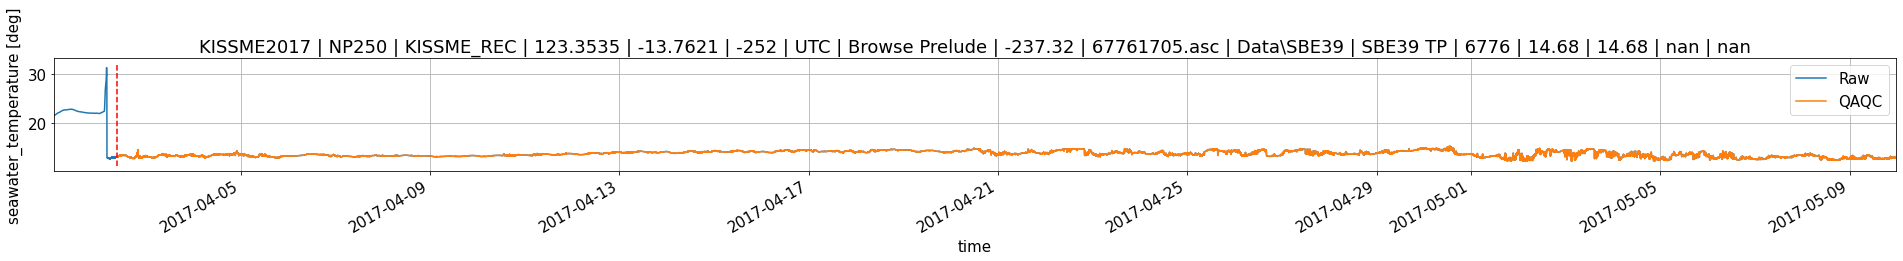

Project                 KISSME2017
StationID                    NP250
Trip Recovered          KISSME_REC
Longitude                 123.3535
Latitude                  -13.7621
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -222.32
FileName                  4455.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      4455
InstrumentHeight             29.68
DeploymentHeight             29.68
Orientation                    NaN
SidelobeInt                    NaN
Name: 27, dtype: object
E:\Experiments\kissme17\Data\SBE39\4455.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "4455.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics'

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


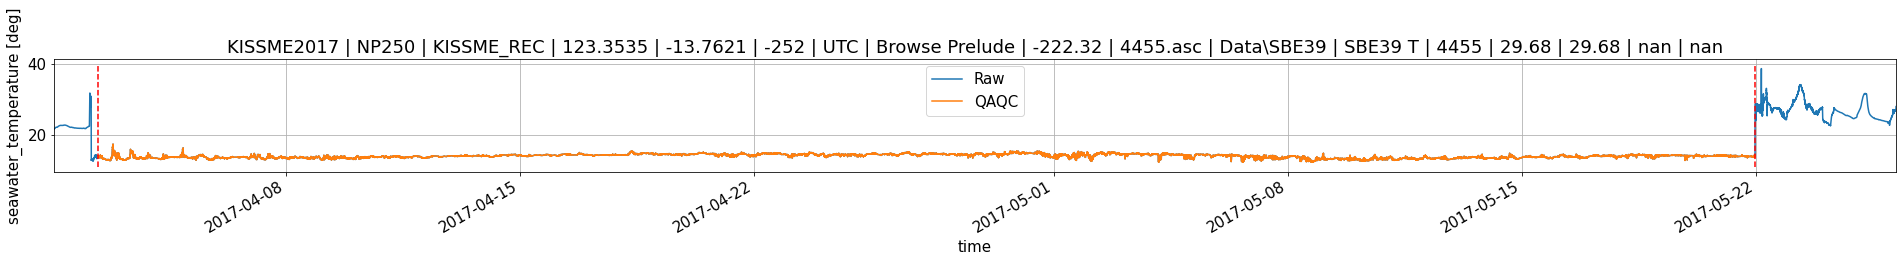

Project                 KISSME2017
StationID                    NP250
Trip Recovered          KISSME_REC
Longitude                 123.3535
Latitude                  -13.7621
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -172.32
FileName                  4456.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      4456
InstrumentHeight             79.68
DeploymentHeight             79.68
Orientation                    NaN
SidelobeInt                    NaN
Name: 32, dtype: object
E:\Experiments\kissme17\Data\SBE39\4456.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "4456.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics'

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


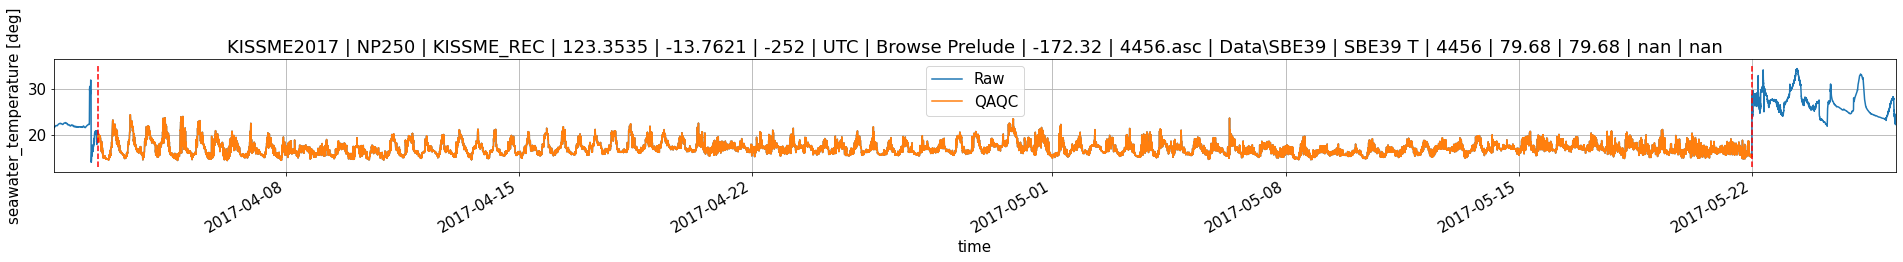

Project                 KISSME2017
StationID                    NP250
Trip Recovered          KISSME_REC
Longitude                 123.3535
Latitude                  -13.7621
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth             -142.2
FileName                  4452.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      4452
InstrumentHeight             109.8
DeploymentHeight             109.8
Orientation                    NaN
SidelobeInt                    NaN
Name: 36, dtype: object
E:\Experiments\kissme17\Data\SBE39\4452.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "4452.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics'

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Blanking 40717 values.


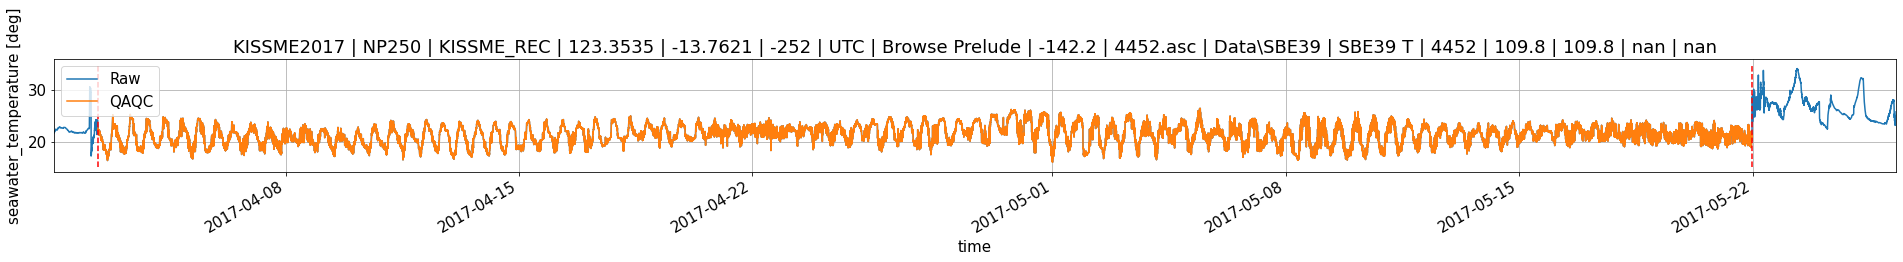

Project                 KISSME2017
StationID                    NP250
Trip Recovered          KISSME_REC
Longitude                 123.3535
Latitude                  -13.7621
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -52.2
FileName                  6617.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      6617
InstrumentHeight             199.8
DeploymentHeight             199.8
Orientation                    NaN
SidelobeInt                    NaN
Name: 45, dtype: object
E:\Experiments\kissme17\Data\SBE39\6617.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "6617.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_di

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


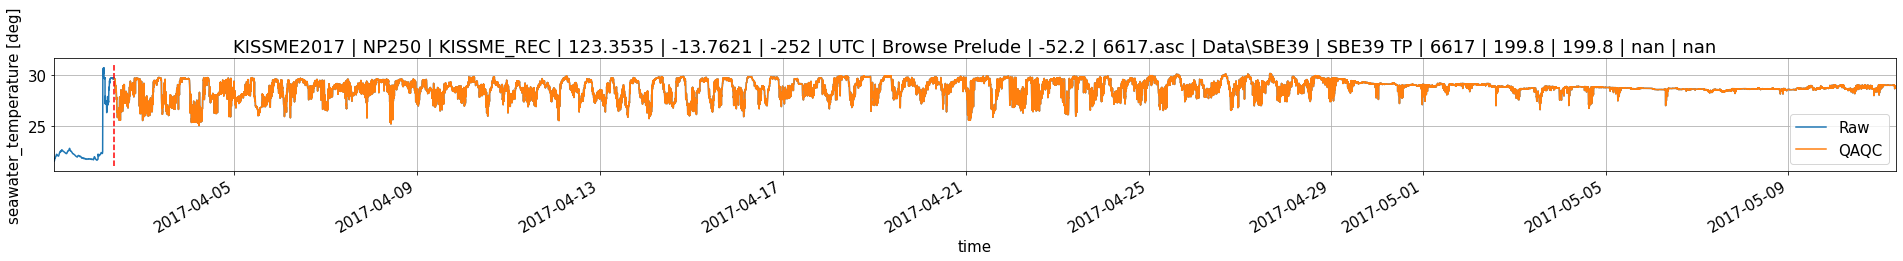

Project                 KISSME2017
StationID                    SP250
Trip Recovered          KISSME_REC
Longitude                 123.3542
Latitude                  -13.7669
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth             -236.6
FileName                  6527.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      6527
InstrumentHeight              15.4
DeploymentHeight              15.4
Orientation                    NaN
SidelobeInt                    NaN
Name: 54, dtype: object
E:\Experiments\kissme17\Data\SBE39\6527.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "6527.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_di

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


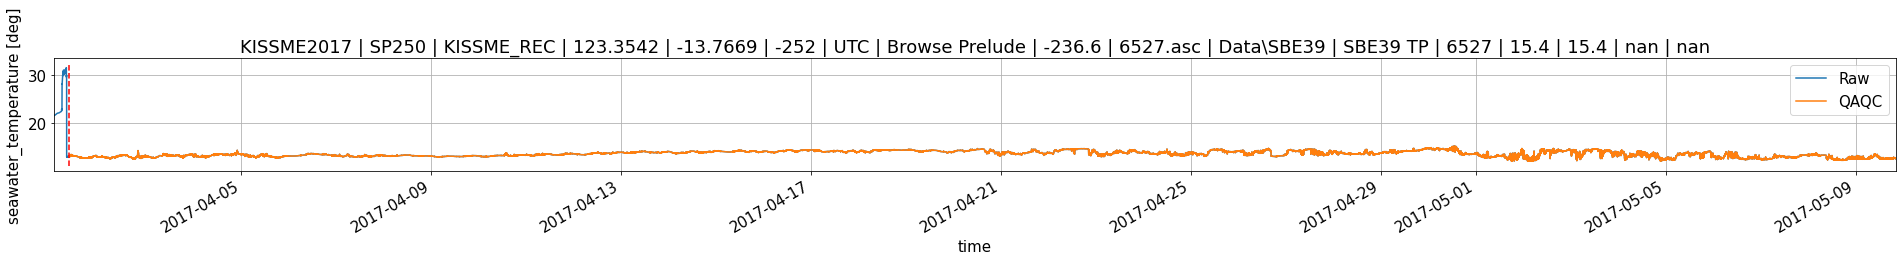

Project                 KISSME2017
StationID                    SP250
Trip Recovered          KISSME_REC
Longitude                 123.3542
Latitude                  -13.7669
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth             -181.8
FileName                  6528.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      6528
InstrumentHeight              70.2
DeploymentHeight              70.2
Orientation                    NaN
SidelobeInt                    NaN
Name: 62, dtype: object
E:\Experiments\kissme17\Data\SBE39\6528.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "6528.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_di

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


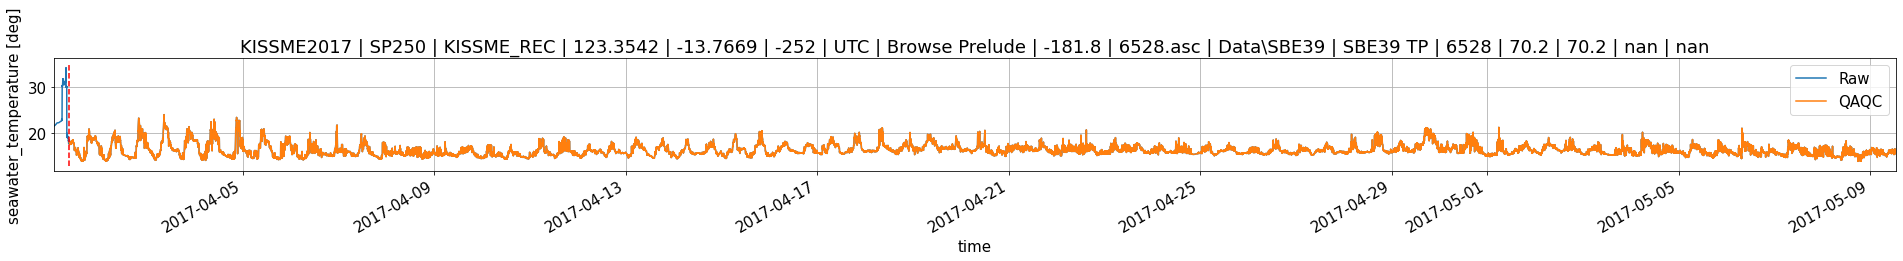

Project                 KISSME2017
StationID                    SP250
Trip Recovered          KISSME_REC
Longitude                 123.3542
Latitude                  -13.7669
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -91.6
FileName                  6523.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      6523
InstrumentHeight             160.4
DeploymentHeight             160.4
Orientation                    NaN
SidelobeInt                    NaN
Name: 76, dtype: object
E:\Experiments\kissme17\Data\SBE39\6523.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "6523.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_di

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Blanking 1921 values.


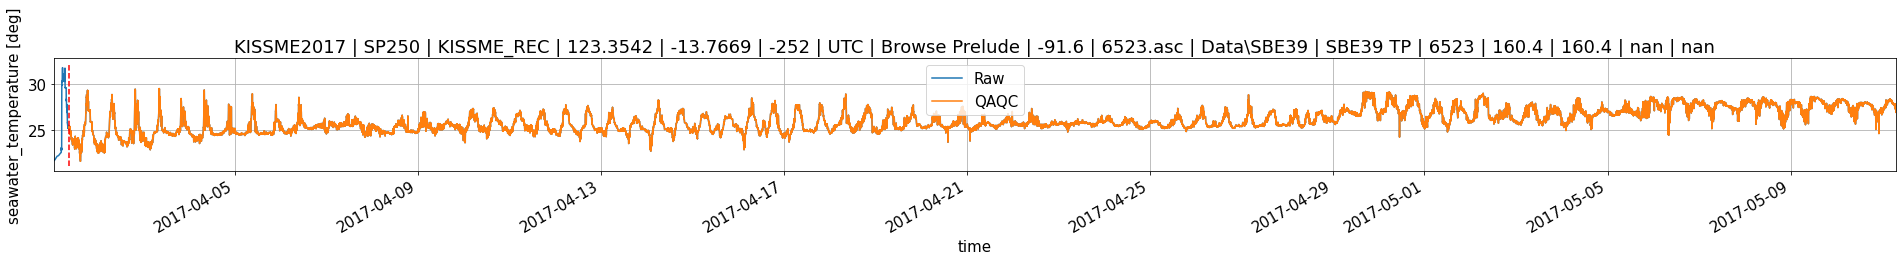

Project                 KISSME2017
StationID                    SP250
Trip Recovered          KISSME_REC
Longitude                 123.3542
Latitude                  -13.7669
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -21.8
FileName                  5082.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      5082
InstrumentHeight             230.2
DeploymentHeight             230.2
Orientation                    NaN
SidelobeInt                    NaN
Name: 83, dtype: object
E:\Experiments\kissme17\Data\SBE39\5082.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "5082.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_di

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


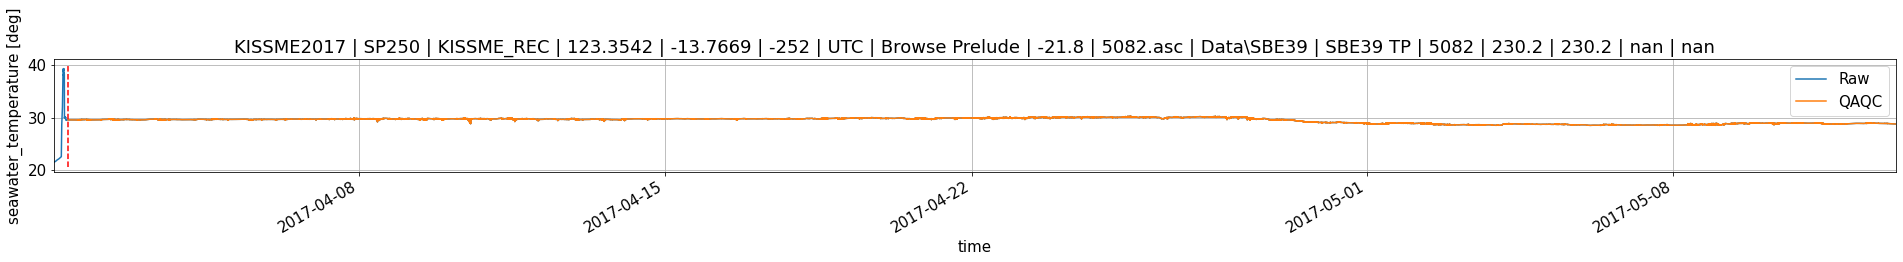

Project                 KISSME2017
StationID             SP250-Lander
Trip Recovered          KISSME_REC
Longitude                 123.3539
Latitude                  -13.7681
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -251.24
FileName                  4454.asc
FilePath                Data\SBE39
InstrumentType         SBE39-ext T
SerialNo                      4454
InstrumentHeight              0.76
DeploymentHeight              0.76
Orientation                    NaN
SidelobeInt                    NaN
Name: 88, dtype: object
E:\Experiments\kissme17\Data\SBE39\4454.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "4454.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics'

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


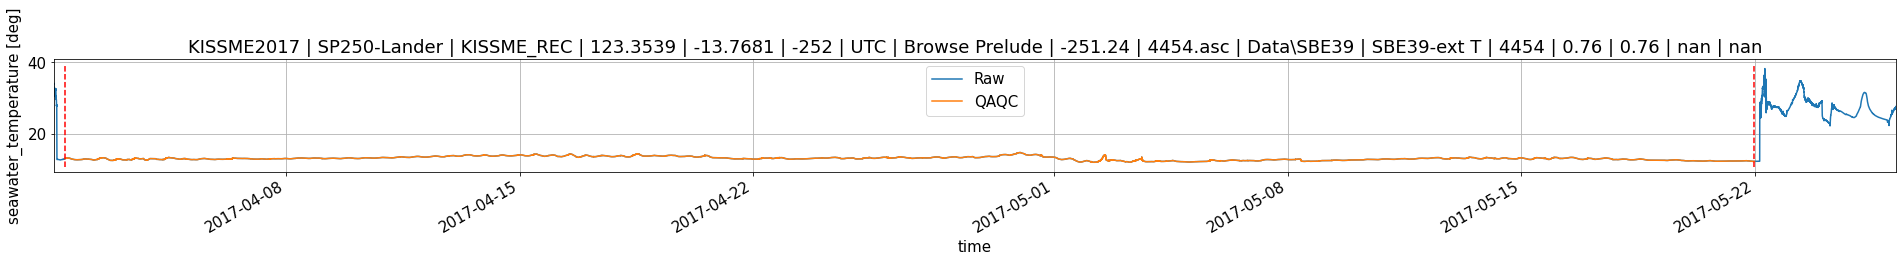

Project                 KISSME2017
StationID             SP250-Lander
Trip Recovered          KISSME_REC
Longitude                 123.3539
Latitude                  -13.7681
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -250.87
FileName                  4453.asc
FilePath                Data\SBE39
InstrumentType         SBE39-ext T
SerialNo                      4453
InstrumentHeight              1.13
DeploymentHeight              1.13
Orientation                    NaN
SidelobeInt                    NaN
Name: 90, dtype: object
E:\Experiments\kissme17\Data\SBE39\4453.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "4453.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics'

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


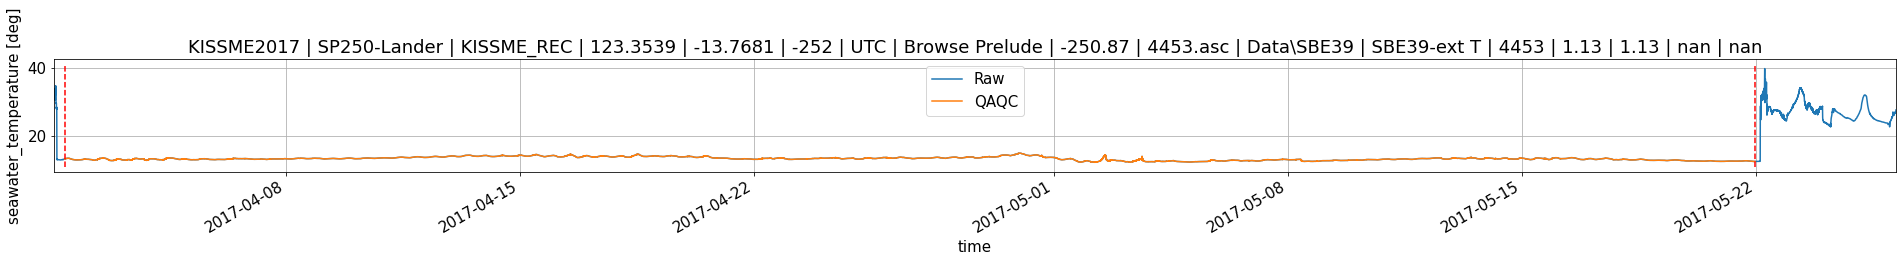

Project                 KISSME2017
StationID             SP250-Lander
Trip Recovered          KISSME_REC
Longitude                 123.3539
Latitude                  -13.7681
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -231.74
FileName                  6530.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      6530
InstrumentHeight             20.26
DeploymentHeight             20.26
Orientation                    NaN
SidelobeInt                    NaN
Name: 103, dtype: object
E:\Experiments\kissme17\Data\SBE39\6530.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "6530.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_d

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


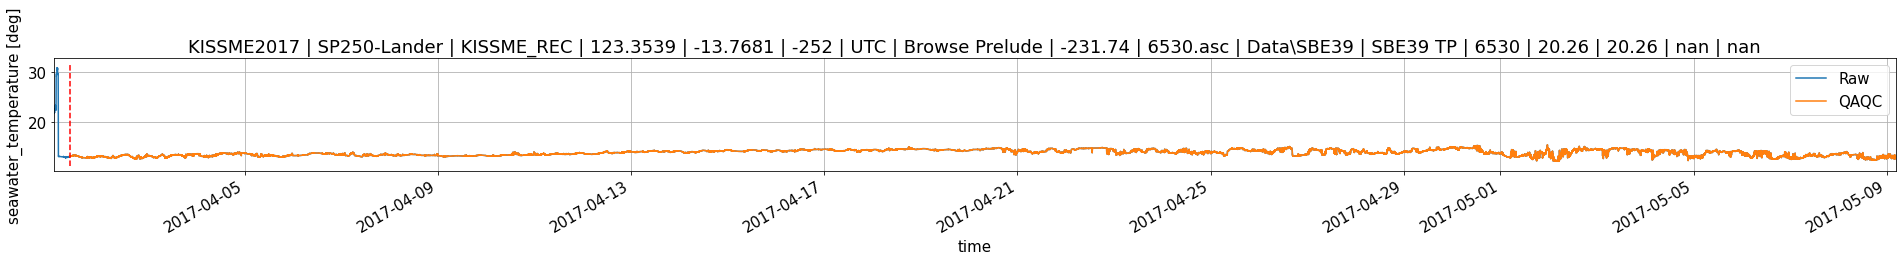

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -247.08
FileName                  3719.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3719
InstrumentHeight              4.92
DeploymentHeight              4.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 106, dtype: object
E:\Experiments\kissme17\Data\SBE39\3719.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3719.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


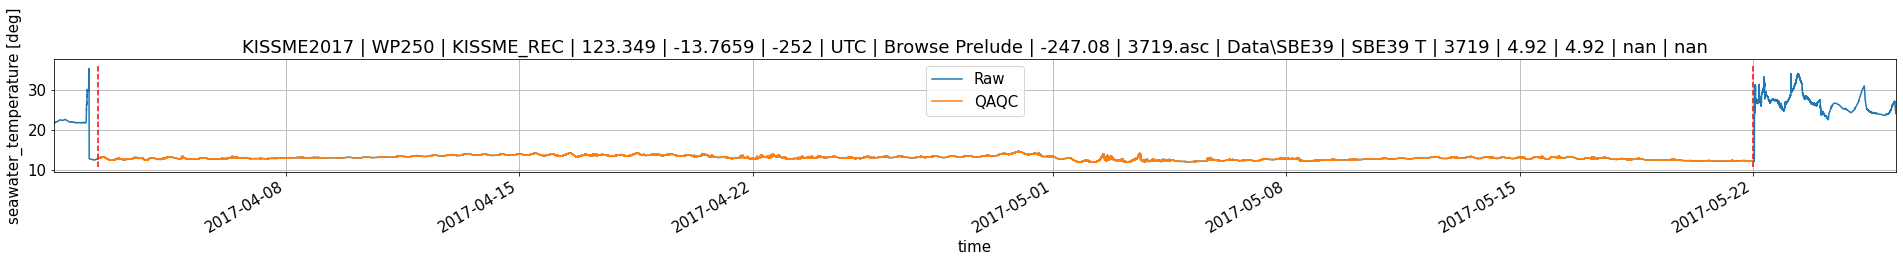

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -242.08
FileName                  3721.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3721
InstrumentHeight              9.92
DeploymentHeight              9.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 107, dtype: object
E:\Experiments\kissme17\Data\SBE39\3721.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3721.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


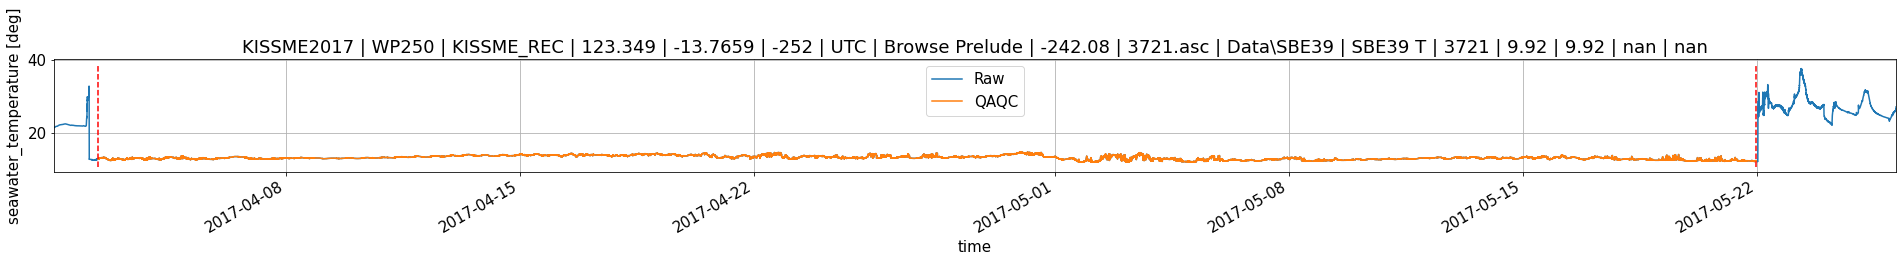

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -237.08
FileName                  6529.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      6529
InstrumentHeight             14.92
DeploymentHeight             14.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 108, dtype: object
E:\Experiments\kissme17\Data\SBE39\6529.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "6529.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_d

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Blanking 7681 values.


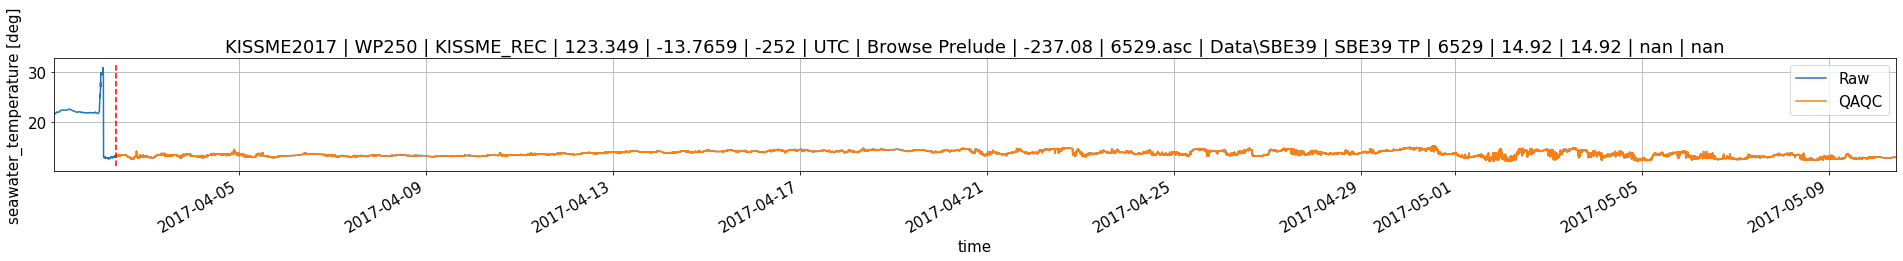

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -232.08
FileName                  3722.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3722
InstrumentHeight             19.92
DeploymentHeight             19.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 109, dtype: object
E:\Experiments\kissme17\Data\SBE39\3722.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3722.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


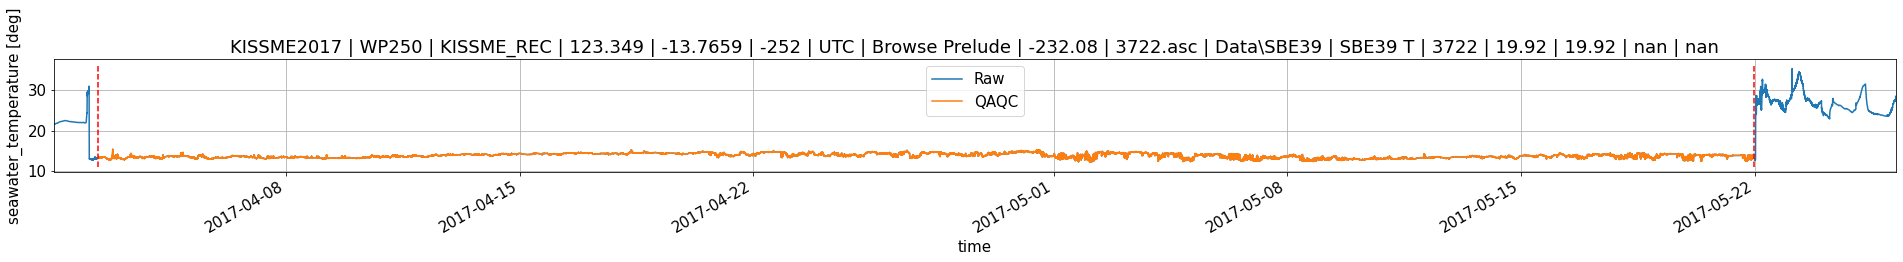

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -222.08
FileName                  3723.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3723
InstrumentHeight             29.92
DeploymentHeight             29.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 110, dtype: object
E:\Experiments\kissme17\Data\SBE39\3723.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3723.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


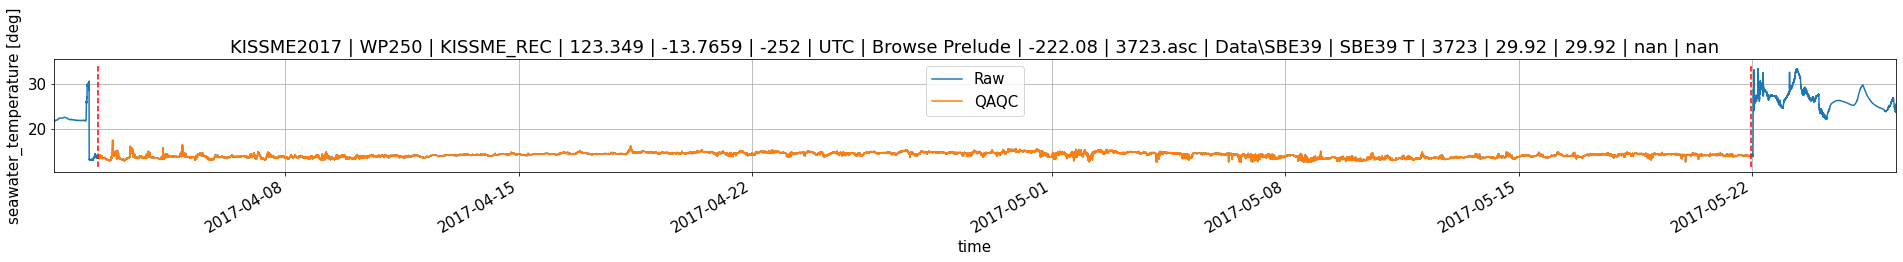

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -212.08
FileName                  3724.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3724
InstrumentHeight             39.92
DeploymentHeight             39.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 111, dtype: object
E:\Experiments\kissme17\Data\SBE39\3724.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3724.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


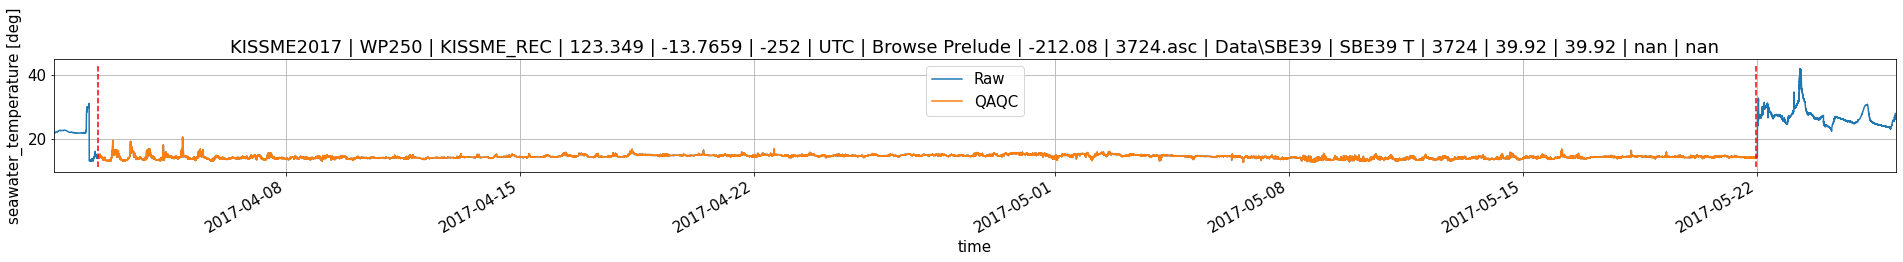

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -202.08
FileName                  3725.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3725
InstrumentHeight             49.92
DeploymentHeight             49.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 112, dtype: object
E:\Experiments\kissme17\Data\SBE39\3725.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3725.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


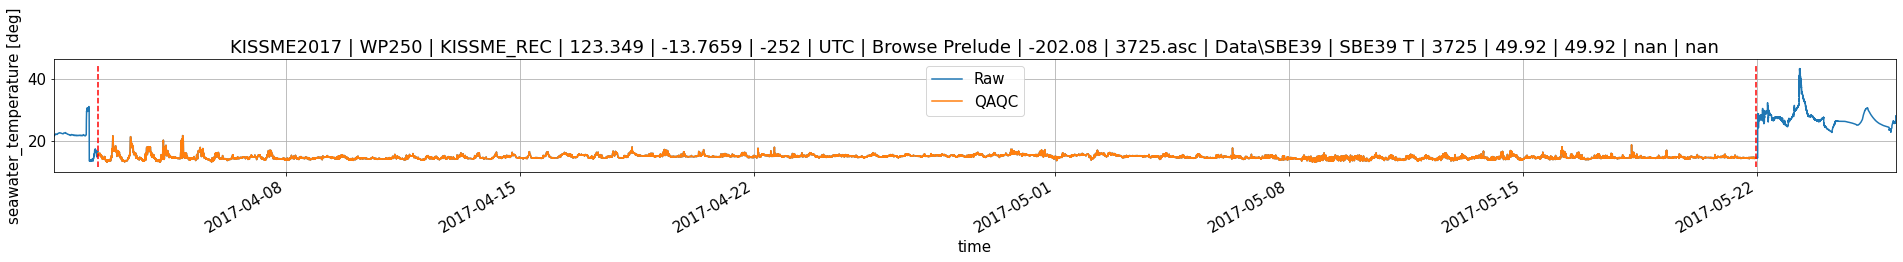

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -192.08
FileName                  3726.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3726
InstrumentHeight             59.92
DeploymentHeight             59.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 113, dtype: object
E:\Experiments\kissme17\Data\SBE39\3726.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3726.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


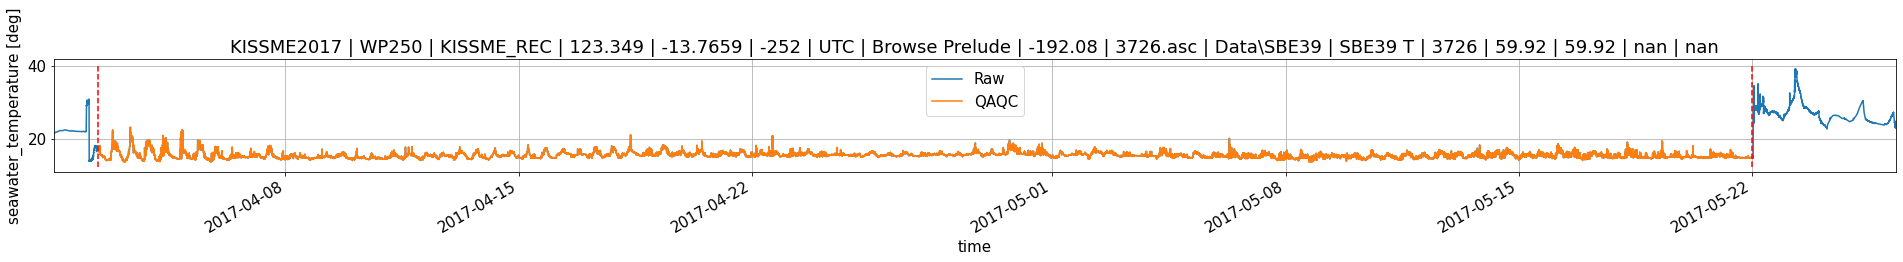

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -182.08
FileName                  3727.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3727
InstrumentHeight             69.92
DeploymentHeight             69.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 114, dtype: object
E:\Experiments\kissme17\Data\SBE39\3727.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3727.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


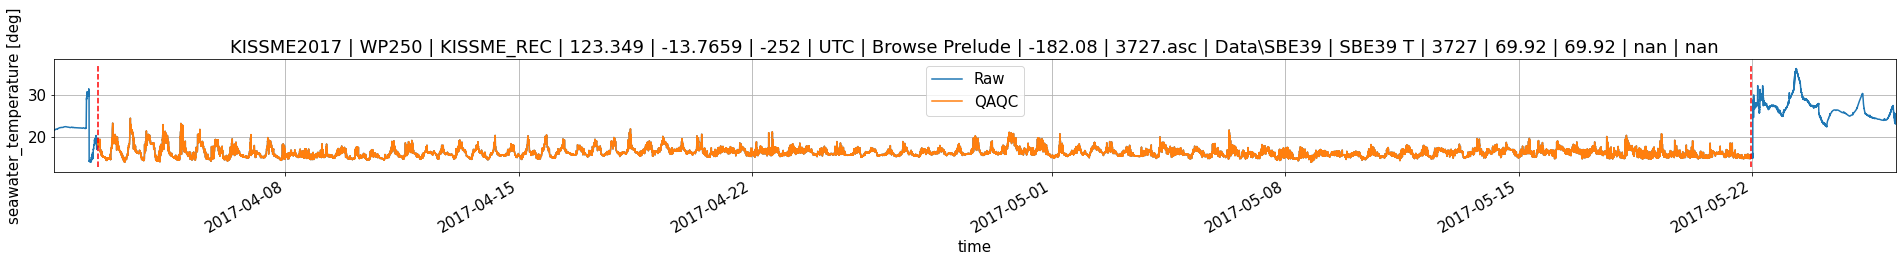

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -172.08
FileName                  3728.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3728
InstrumentHeight             79.92
DeploymentHeight             79.92
Orientation                    NaN
SidelobeInt                    NaN
Name: 115, dtype: object
E:\Experiments\kissme17\Data\SBE39\3728.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3728.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


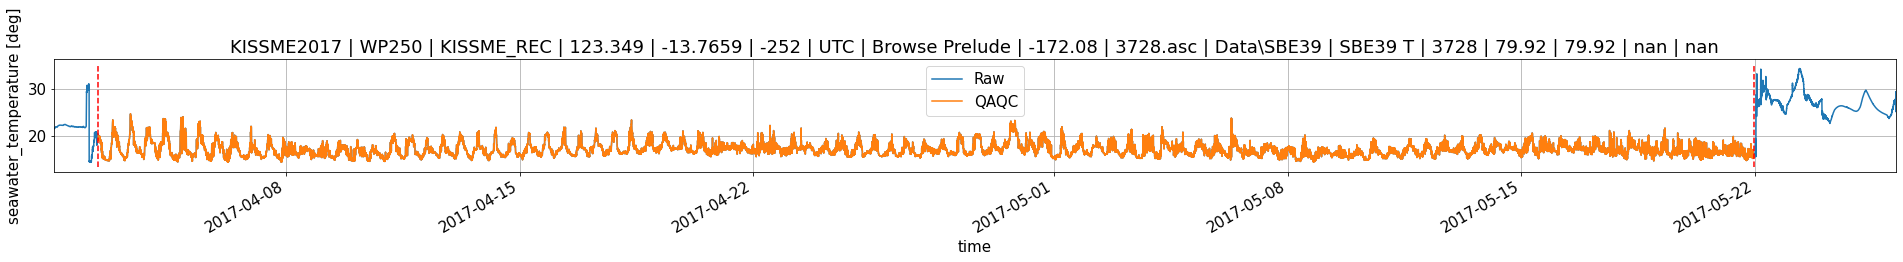

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -152.01
FileName                  3729.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3729
InstrumentHeight             99.99
DeploymentHeight             99.99
Orientation                    NaN
SidelobeInt                    NaN
Name: 119, dtype: object
E:\Experiments\kissme17\Data\SBE39\3729.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3729.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


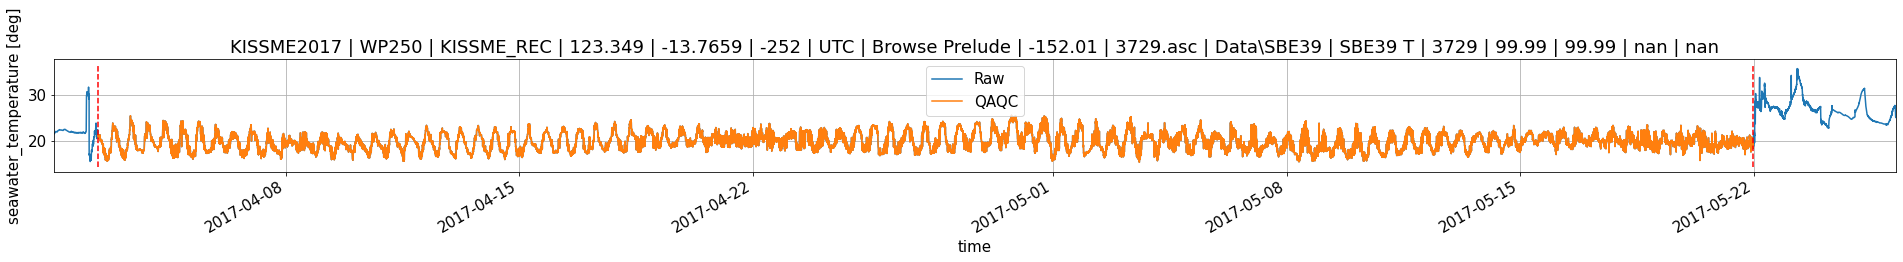

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -142.01
FileName                  3730.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3730
InstrumentHeight            109.99
DeploymentHeight            109.99
Orientation                    NaN
SidelobeInt                    NaN
Name: 120, dtype: object
E:\Experiments\kissme17\Data\SBE39\3730.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3730.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


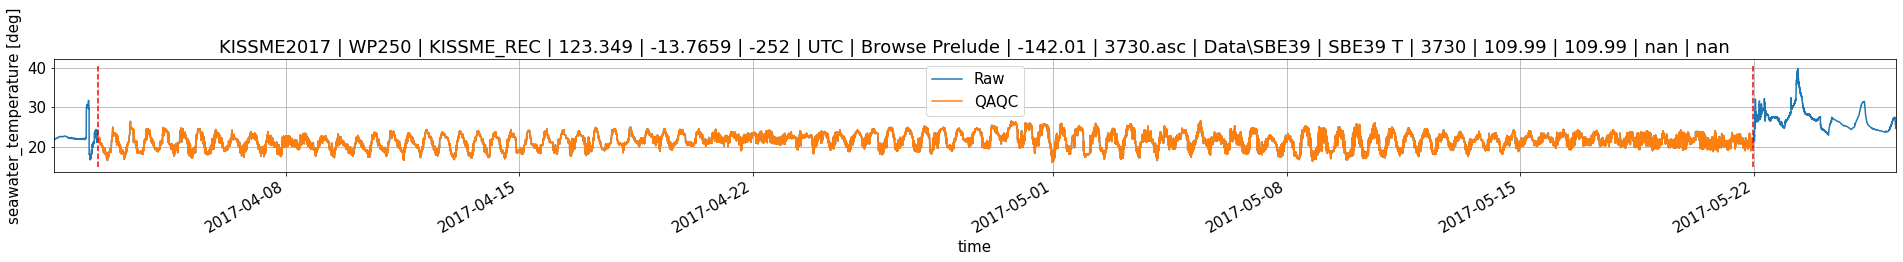

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -132.03
FileName                  3731.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3731
InstrumentHeight            119.97
DeploymentHeight            119.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 121, dtype: object
E:\Experiments\kissme17\Data\SBE39\3731.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3731.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


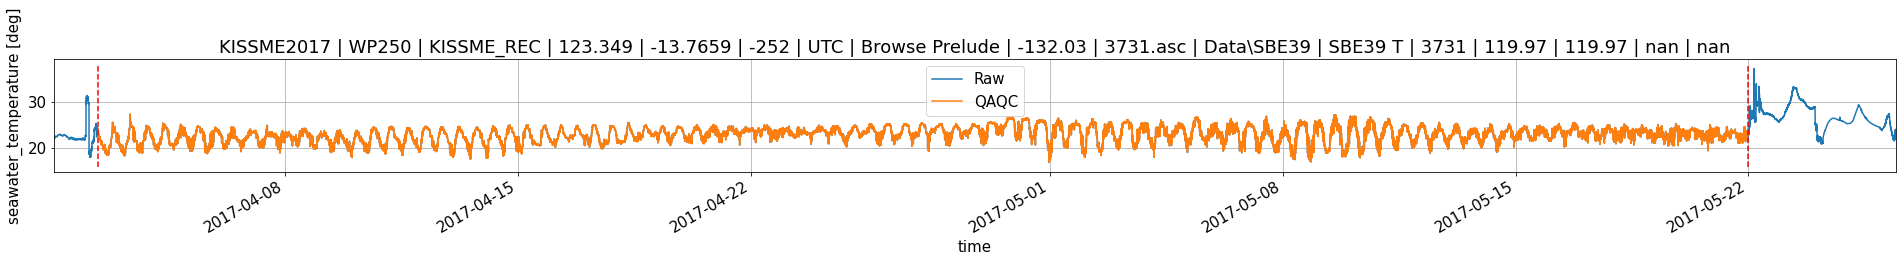

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth             -52.03
FileName                  3754.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3754
InstrumentHeight            199.97
DeploymentHeight            199.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 122, dtype: object
E:\Experiments\kissme17\Data\SBE39\3754.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3754.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


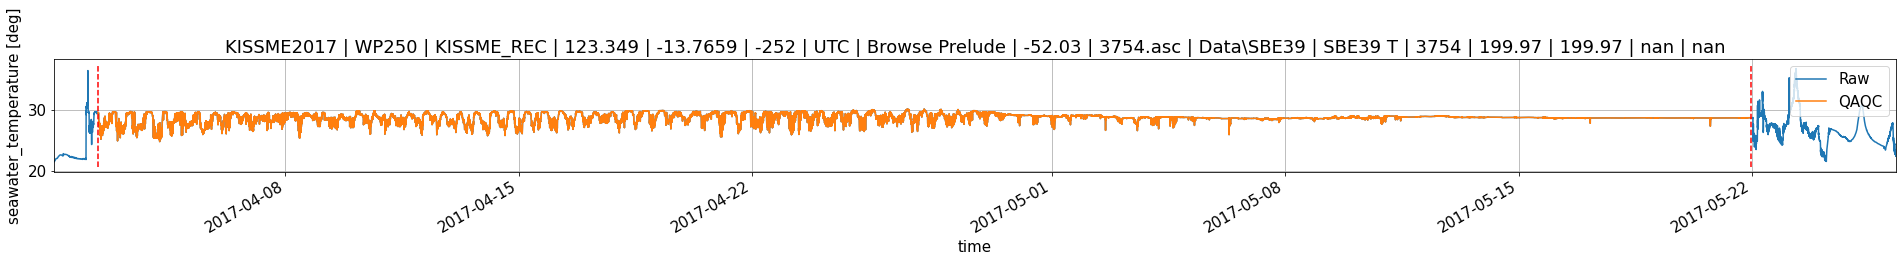

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth             -42.03
FileName                  3798.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3798
InstrumentHeight            209.97
DeploymentHeight            209.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 123, dtype: object
E:\Experiments\kissme17\Data\SBE39\3798.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3798.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


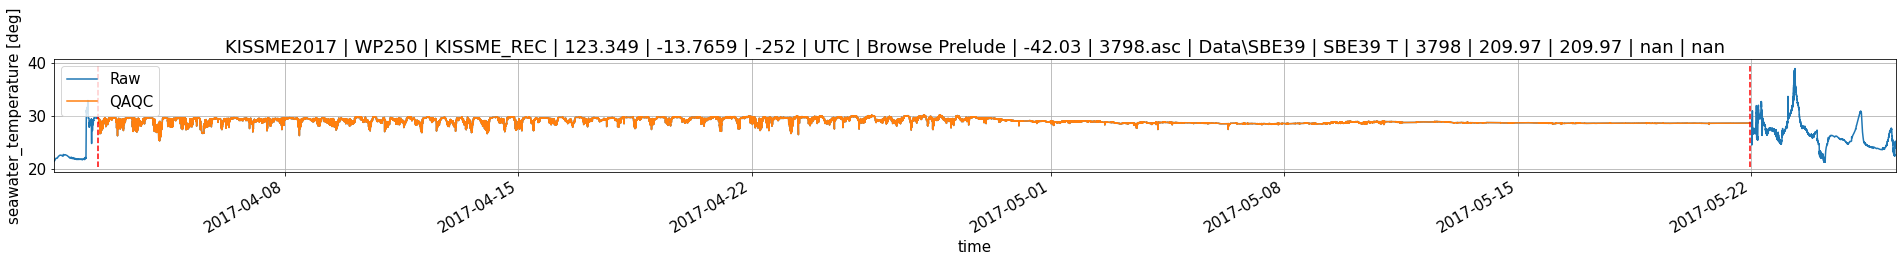

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -22.0
FileName                  3799.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3799
InstrumentHeight             230.0
DeploymentHeight            219.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 124, dtype: object
E:\Experiments\kissme17\Data\SBE39\3799.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3799.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


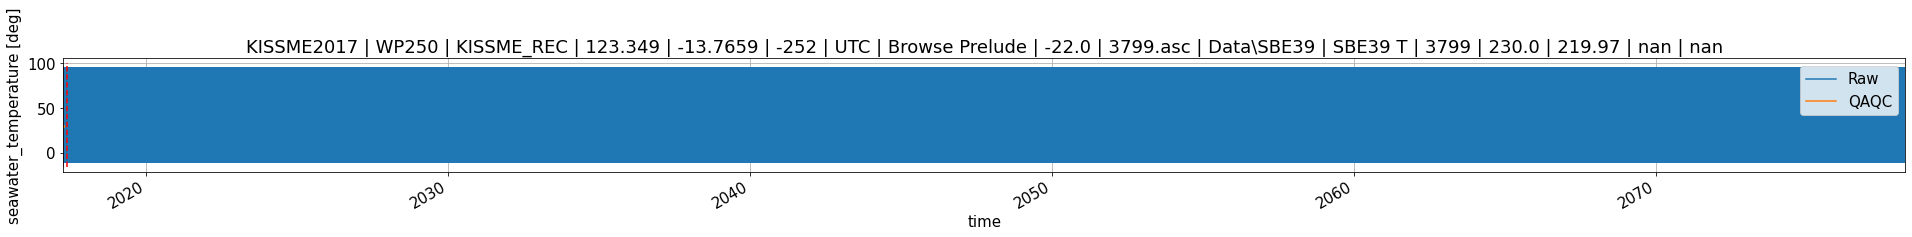

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -62.0
FileName                  3753.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3753
InstrumentHeight             190.0
DeploymentHeight            189.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 125, dtype: object
E:\Experiments\kissme17\Data\SBE39\3753.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3753.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


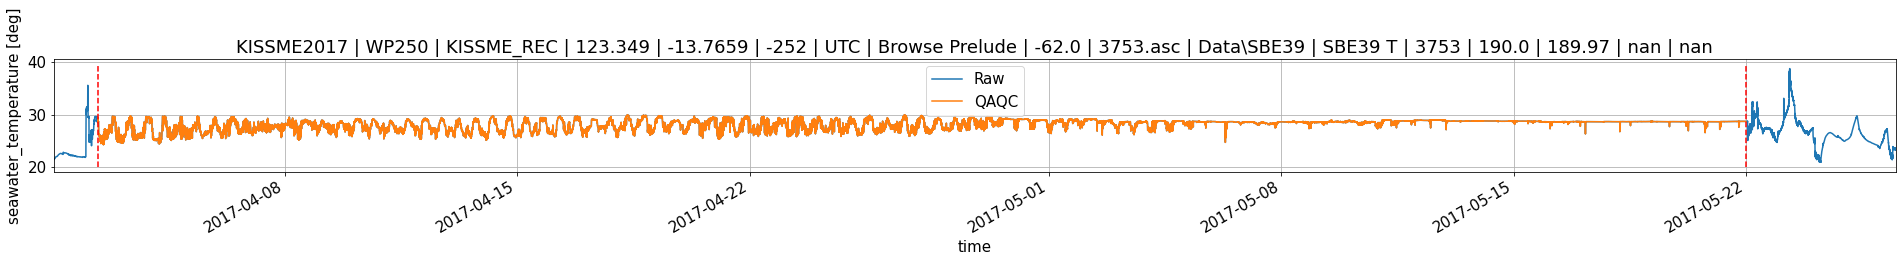

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -62.0
FileName                  3752.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3752
InstrumentHeight             190.0
DeploymentHeight            179.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 126, dtype: object
E:\Experiments\kissme17\Data\SBE39\3752.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3752.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


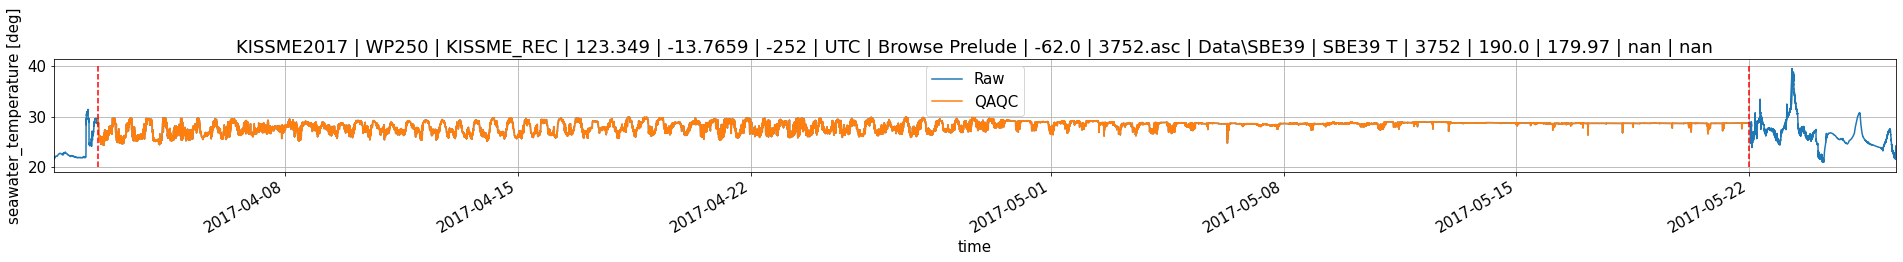

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -62.0
FileName                  3750.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3750
InstrumentHeight             190.0
DeploymentHeight            169.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 127, dtype: object
E:\Experiments\kissme17\Data\SBE39\3750.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3750.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


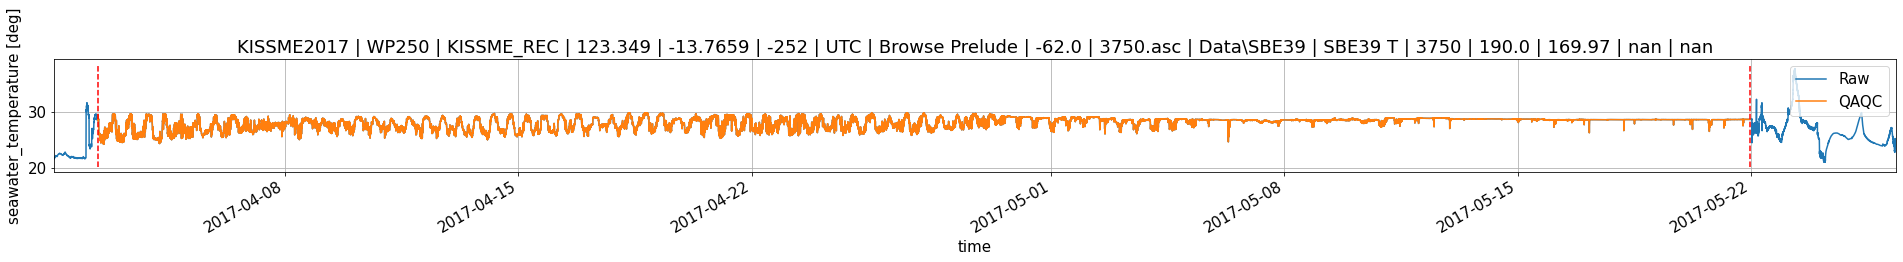

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -62.0
FileName                  3749.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3749
InstrumentHeight             190.0
DeploymentHeight            149.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 128, dtype: object
E:\Experiments\kissme17\Data\SBE39\3749.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3749.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


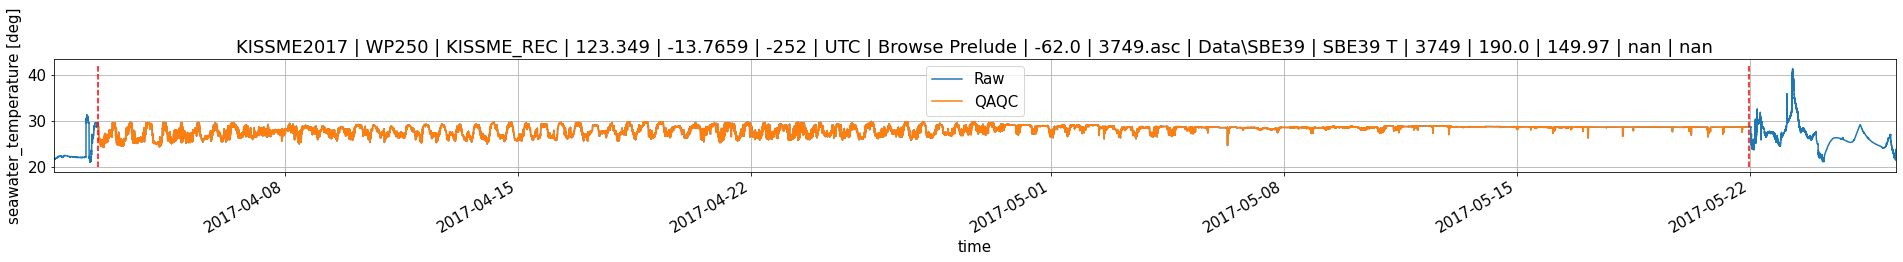

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -62.0
FileName                  3747.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      3747
InstrumentHeight             190.0
DeploymentHeight            139.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 129, dtype: object
E:\Experiments\kissme17\Data\SBE39\3747.asc
File exists
asc file appears to be for an SBE39...
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3747.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


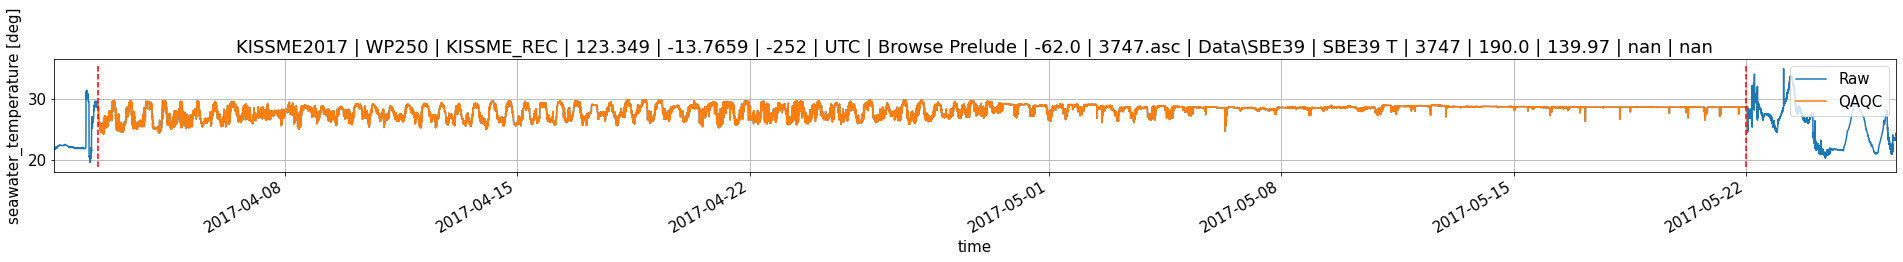

Project                 KISSME2017
StationID                    WP250
Trip Recovered          KISSME_REC
Longitude                  123.349
Latitude                  -13.7659
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth              -22.0
FileName                  6526.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      6526
InstrumentHeight             230.0
DeploymentHeight            229.97
Orientation                    NaN
SidelobeInt                    NaN
Name: 130, dtype: object
E:\Experiments\kissme17\Data\SBE39\6526.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "6526.asc"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE39"
{'title': '', 'institution': 'The University of Western Australia', 'institution_d

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Blanking 7681 values.


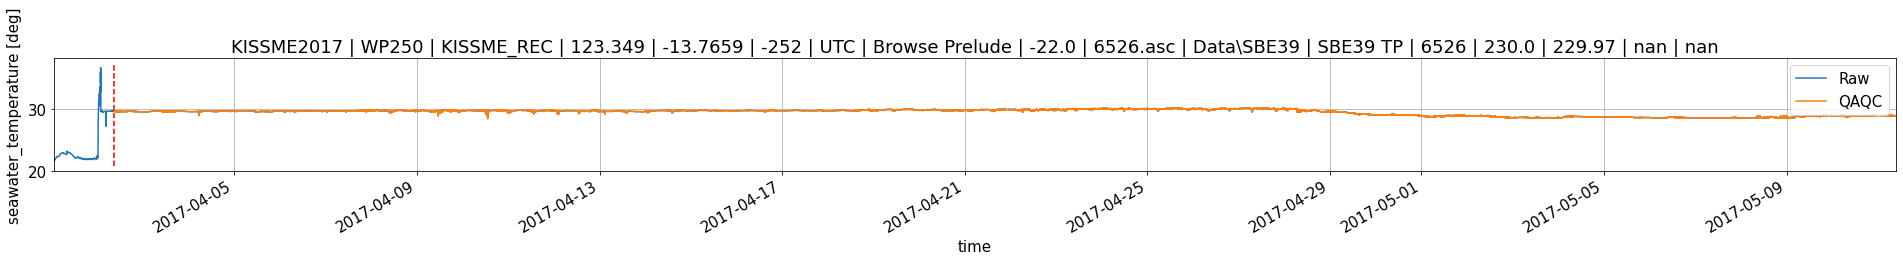

In [10]:
# csvfile = os.path.join(db_config['db_root'], db_config['db_csv'])
# os.path.exists(csvfile)
importlib.reload(ai)

filetypes = ['SBE39 TP', 'SBE39 T', 'SBE39-ext T', 'SBE37 CT'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

df = db_data['deployment_metadata']
# df = df.loc[df['SerialNo']==3799]

for index, row in df.iterrows():
#     line = line.split(',')
    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']

    attributes = ai.row_to_attrs(row)

    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in ['SBE39 TP', 'SBE39 T', 'SBE39-ext T']:
        print(row)

        asc_filename = os.path.join(project_root, row['FilePath'], row['FileName'])
        print(asc_filename)

        if os.path.exists(asc_filename):
            print('File exists')
        else:
            raise(Exception)

#             mcout_asc = read_sbd.parse_seabird_asc(asc_filename)

        folder, file = os.path.split(asc_filename)
        rr, ds = seabird_37_39_56.from_asc(asc_filename)

        rr.update_attributes_with_dict(attributes)

#         ai.qc_impossible_date(rr, mooring, db_data, year_1=1890)
        pqc.pimosInOutWaterQC(rr, mooring, db_data, year_1=1890)

        ai.pIMOS_export(rr, archive_dir, instrument[0:5], sn)
        fig = ai.plot_temp(rr, db_data, mooring, attributes)
        
        png_path = rr.fullpath_last_export[0:-3] +'.png'
        fig.savefig(png_path, dpi=300)
                        

Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
whoa
G:\Experiments\kissme17\Data\FLNTU\1835.log
G:\Experiments\kissme17\Data\FLNTU\Device Files\1835\FLNTUSB-1835_(NTU).dev
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "1835.log"
Setting attribute "raw_file_directory" to "G:\Experiments\kissme17\Data\FLNTU"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': '183

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1022: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


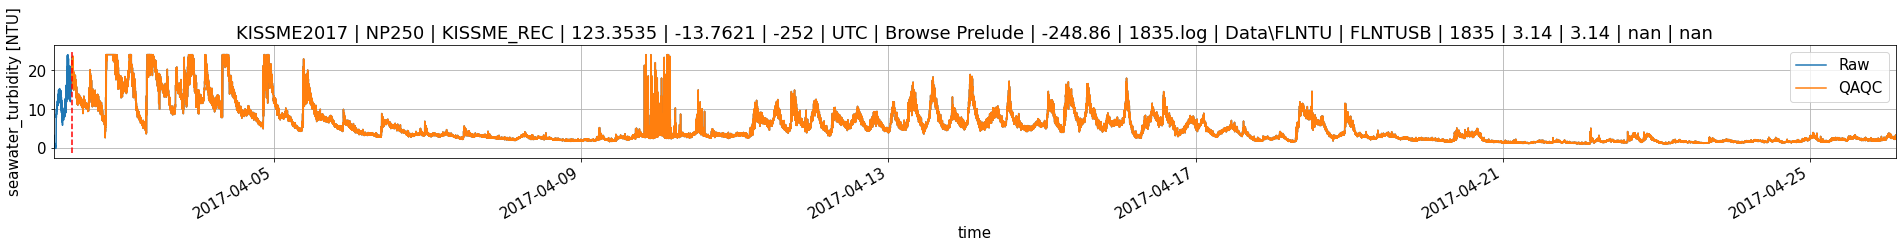

whoa
G:\Experiments\kissme17\Data/FLNTU\3194.log
G:\Experiments\kissme17\Data\FLNTU\Device Files\3194\FLNTUSB-3194(NTU).dev
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "3194.log"
Setting attribute "raw_file_directory" to "G:\Experiments\kissme17\Data/FLNTU"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': '3194.log', 'raw_file_directory': 'G:\\Experiments\\kissme17\\Data/FLNTU', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_latitude': '', 'nominal_longitude': '', 'nominal_site_depth': 

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1022: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


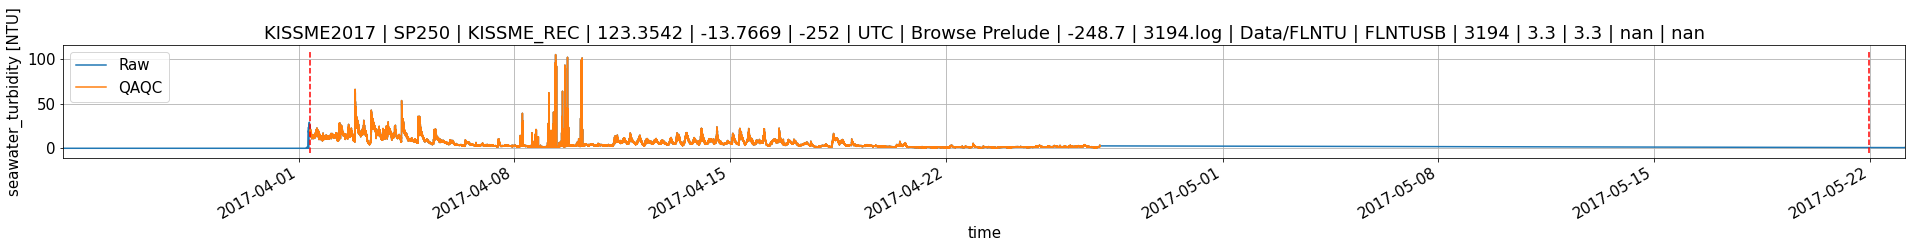

whoa
G:\Experiments\kissme17\Data\FLNTU\2997.log
G:\Experiments\kissme17\Data\FLNTU\Device Files\2997\FLNTUSB-2997(NTU).dev
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "2997.log"
Setting attribute "raw_file_directory" to "G:\Experiments\kissme17\Data\FLNTU"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': '2997.log', 'raw_file_directory': 'G:\\Experiments\\kissme17\\Data\\FLNTU', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_latitude': '', 'nominal_longitude': '', 'nominal_site_depth':

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1022: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


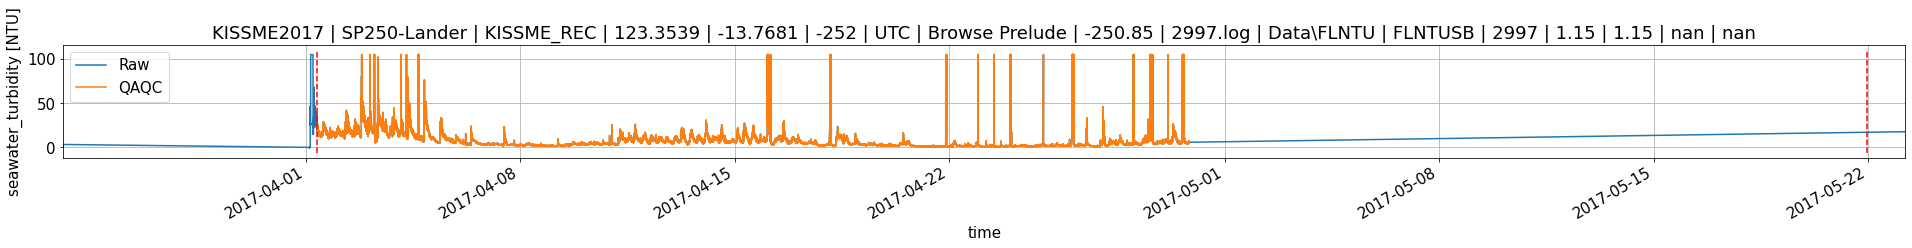

G:\Experiments\kissme17\Data\FLNTU\2535.log
G:\Experiments\kissme17\Data\FLNTU\Device Files\2535\FLNTUSB-2535.dev
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "2535.log"
Setting attribute "raw_file_directory" to "G:\Experiments\kissme17\Data\FLNTU"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': '2535.log', 'raw_file_directory': 'G:\\Experiments\\kissme17\\Data\\FLNTU', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_latitude': '', 'nominal_longitude': '', 'nominal_site_depth': '', 'pres

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1022: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


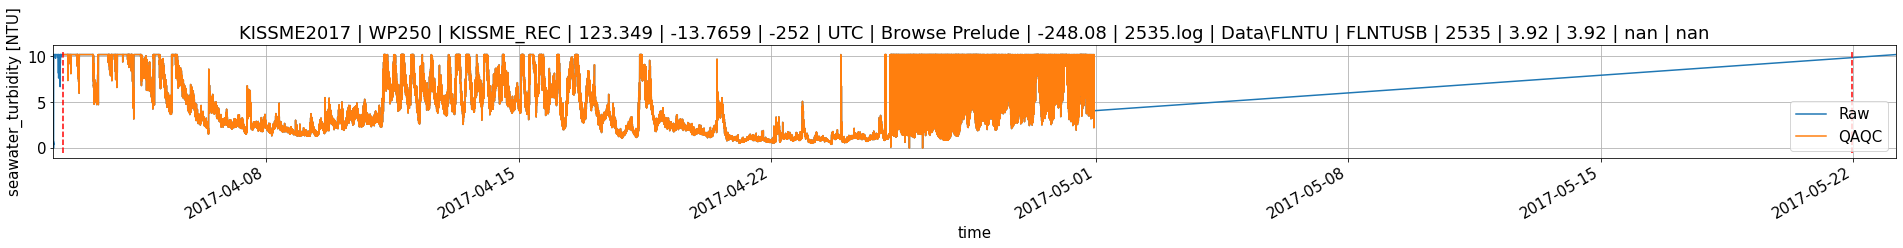

In [2]:

filetypes = ['FLNTUSB'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

dfd = r'G:\Experiments\kissme17\Data\FLNTU\Device Files'

for index, row in db_data['deployment_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    
    attributes = ai.row_to_attrs(row)
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in filetypes:

        filename = os.path.join(project_root, row['FilePath'], row['FileName'])
        folder_df = os.path.join(project_root, 'Data\FLNTU\Device Files', str(sn))
        dfn = glob.glob(folder_df+'/*.dev')
        
        if not len(dfn)==1:
            print('whoa')
            dfn = [i for i in dfn if '(NTU)' in os.path.split(i)[1]]
        else:
            pass
        
        dfn = dfn[0]            
        
        print(filename)
        print(dfn)
        
        rr, ds = wetlabs_ntu.from_log(filename)
        rr._calibrate_device(dfn)
        
        rr.update_attributes_with_dict(attributes)

        pqc.pimosInOutWaterQC(rr, mooring, db_data)
                
        ai.pIMOS_export(rr, archive_dir, instrument, sn)
        fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='turbidity',plotraw=True)
        
        png_path = rr.fullpath_last_export[0:-3] +'.png'
        fig.savefig(png_path, dpi=300)
        

### Now the SEABIRD data files that load from cnvs

Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
E:\Experiments\kissme17\Data\SBE56\SBE056_00577_2017-05-24.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE056_00577_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE056_00577_2017-05-24.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 590777 values.


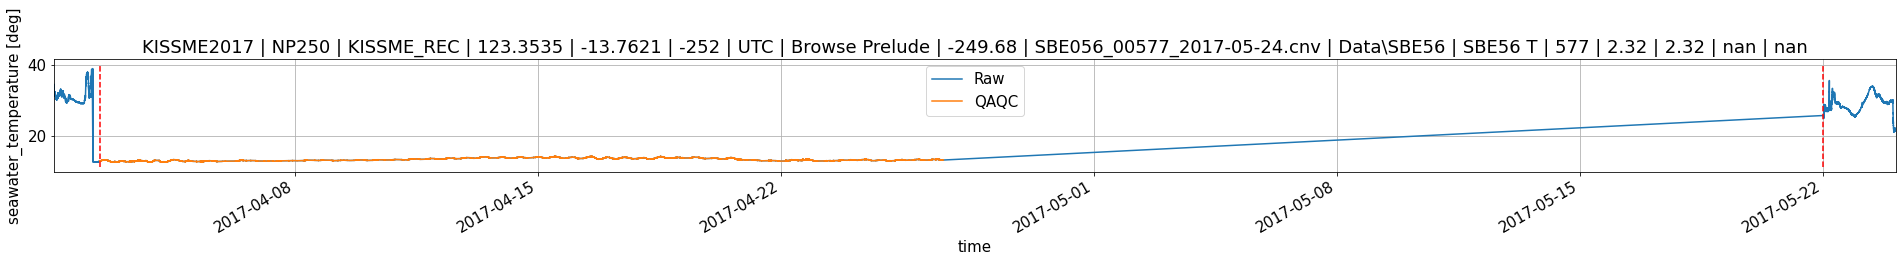

E:\Experiments\kissme17\Data\SBE37\SBE37SM-11063.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE37\SBE37SM-11063.cnv...
No lat/lon stored.
Time code timeS
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE37SM-11063.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE37"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE37SM-11063.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE37', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


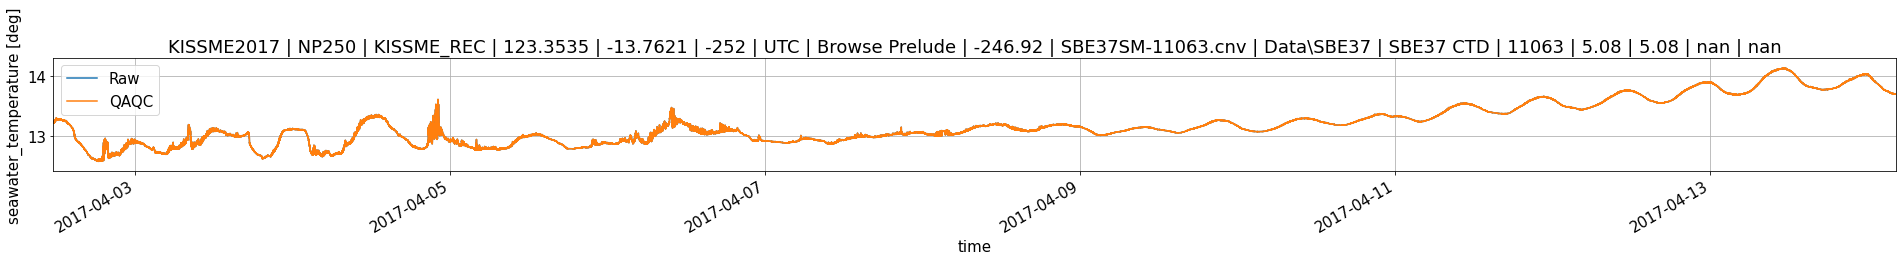

E:\Experiments\kissme17\Data\SBE56\SBE05607371.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607371.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607371.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607371.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[968]_[SBE56 T]_[737100]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230402 values.


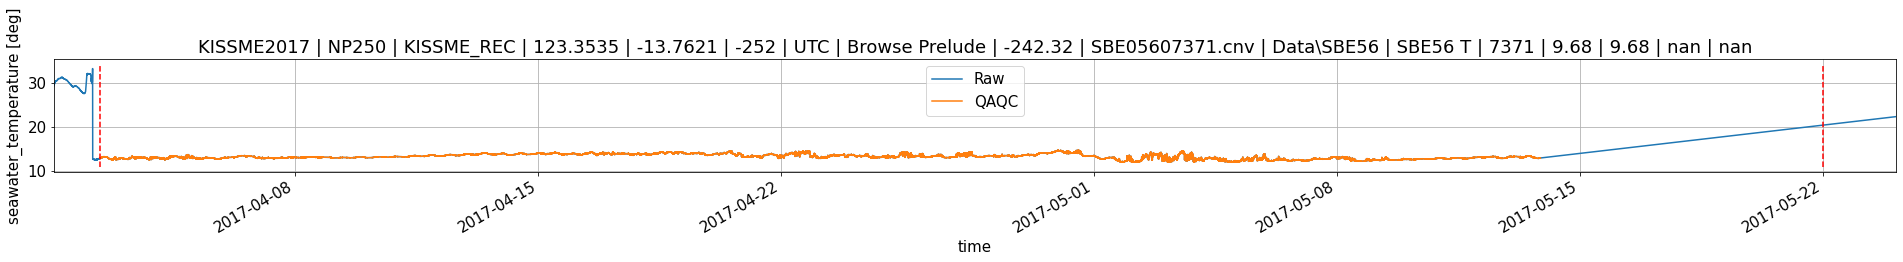

E:\Experiments\kissme17\Data\SBE56\SBE05607374.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607374.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607374.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607374.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[1968]_[SBE56 T]_[737400]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230402 values.


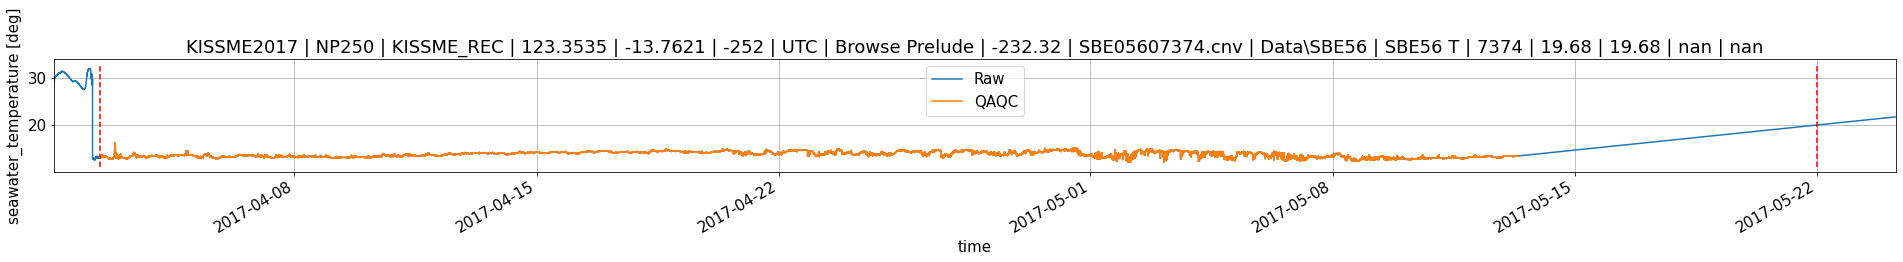

E:\Experiments\kissme17\Data\SBE56\SBE05607375.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607375.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607375.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607375.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 581896 values.


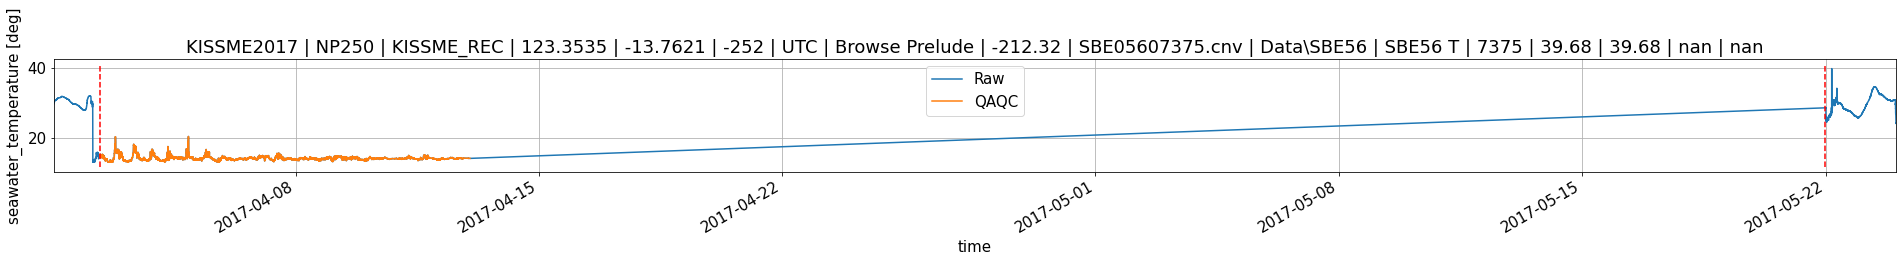

E:\Experiments\kissme17\Data\SBE56\SBE05607376.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607376.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607376.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607376.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[4968]_[SBE56 T]_[737600]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230402 values.


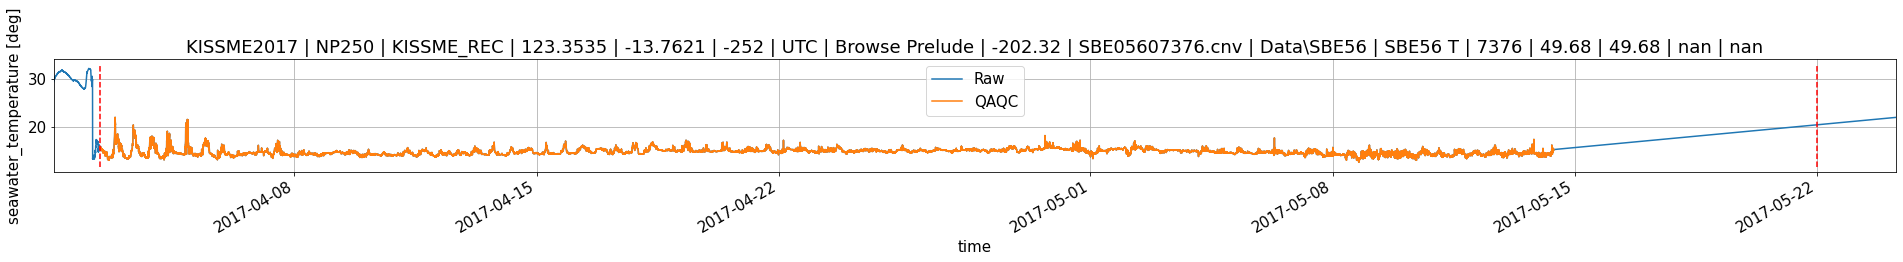

E:\Experiments\kissme17\Data\SBE56\SBE05607377.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607377.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607377.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607377.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[5968]_[SBE56 T]_[737700]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230402 values.


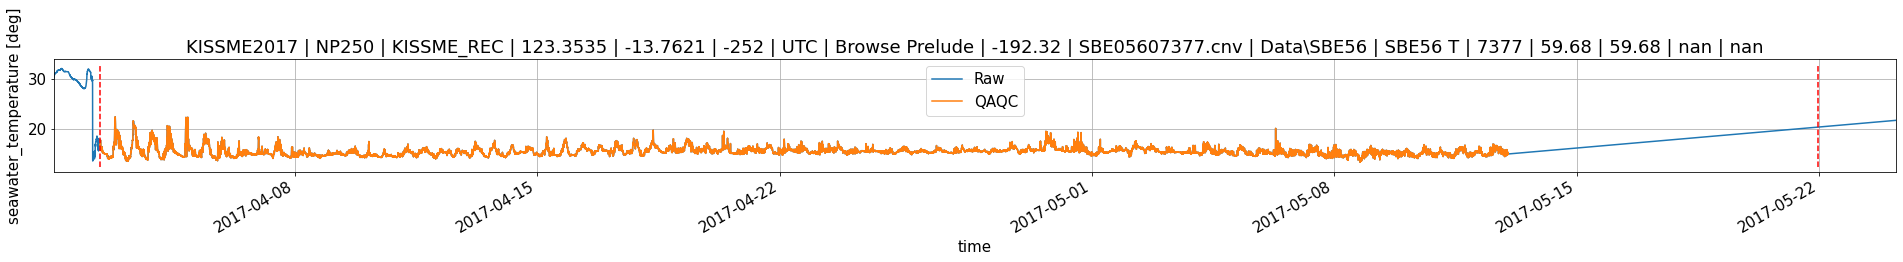

E:\Experiments\kissme17\Data\SBE56\SBE05607378.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607378.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607378.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607378.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[6968]_[SBE56 T]_[737800]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 600295 values.


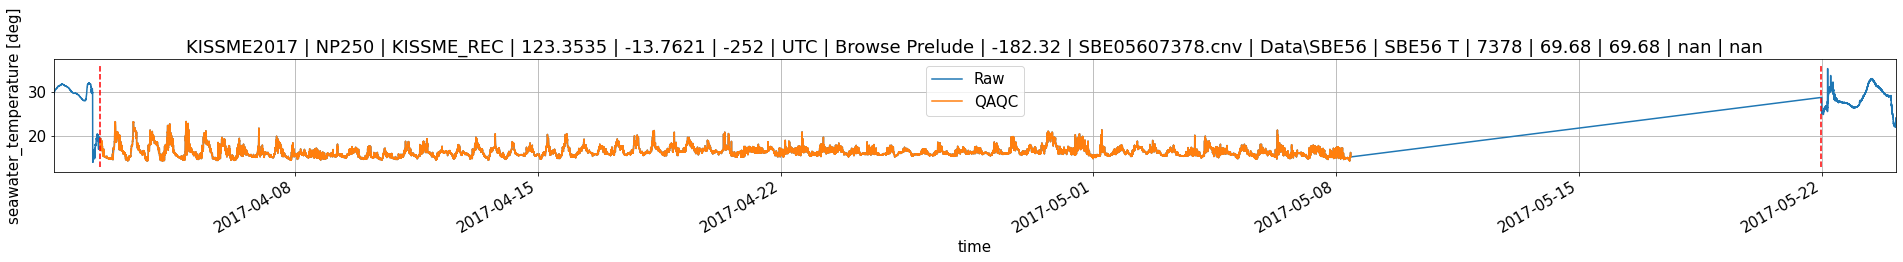

E:\Experiments\kissme17\Data\SBE37\SBE37SM-12739.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE37\SBE37SM-12739.cnv...
No lat/lon stored.
Time code timeS
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE37SM-12739.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE37"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE37SM-12739.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE37', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Blanking 0 values.


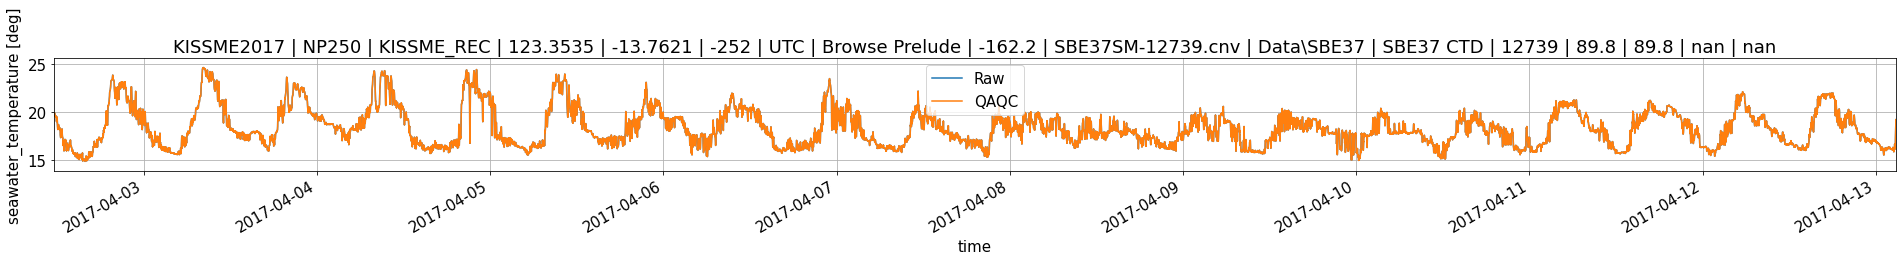

E:\Experiments\kissme17\Data\SBE56\SBE05607399.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607399.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607399.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607399.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[9980]_[SBE56 T]_[739900]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230402 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


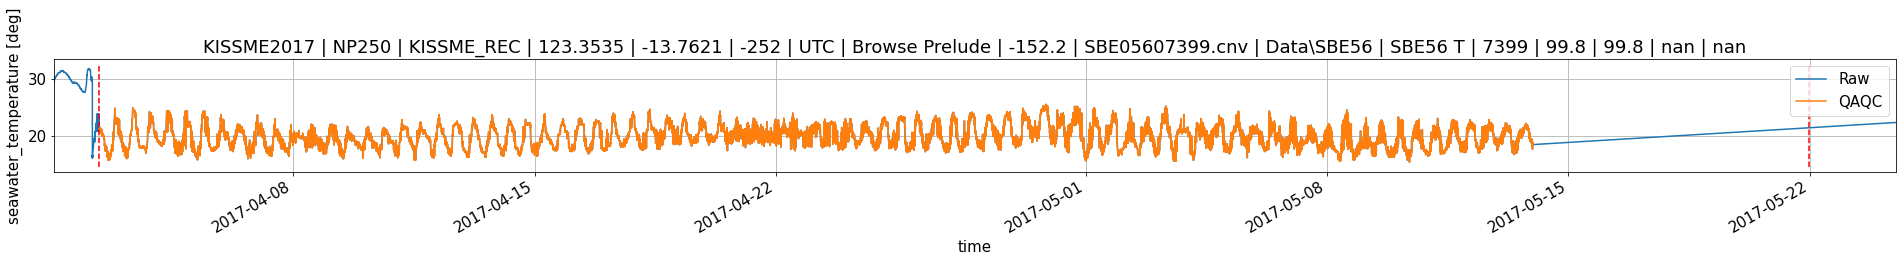

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05607400.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607400.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607400.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607400.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[11980]_[SBE56 T]_[740000]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230460 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


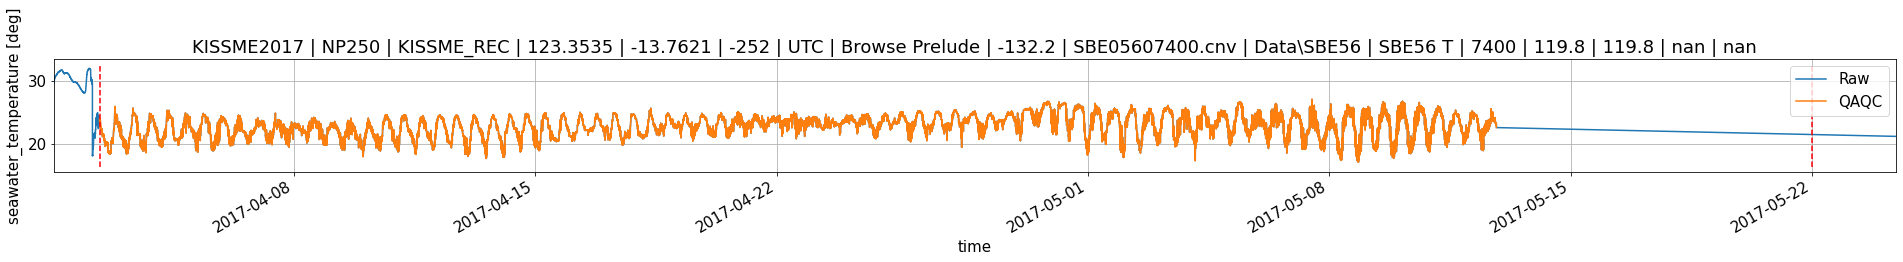

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05607401.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607401.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607401.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607401.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[12980]_[SBE56 T]_[740100]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230402 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


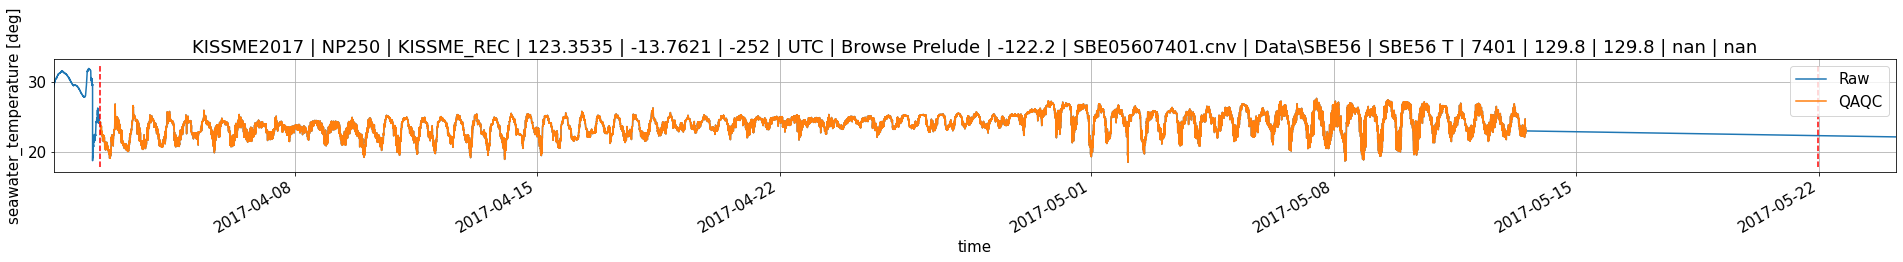

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05607402.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607402.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607402.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607402.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[13980]_[SBE56 T]_[740200]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230524 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


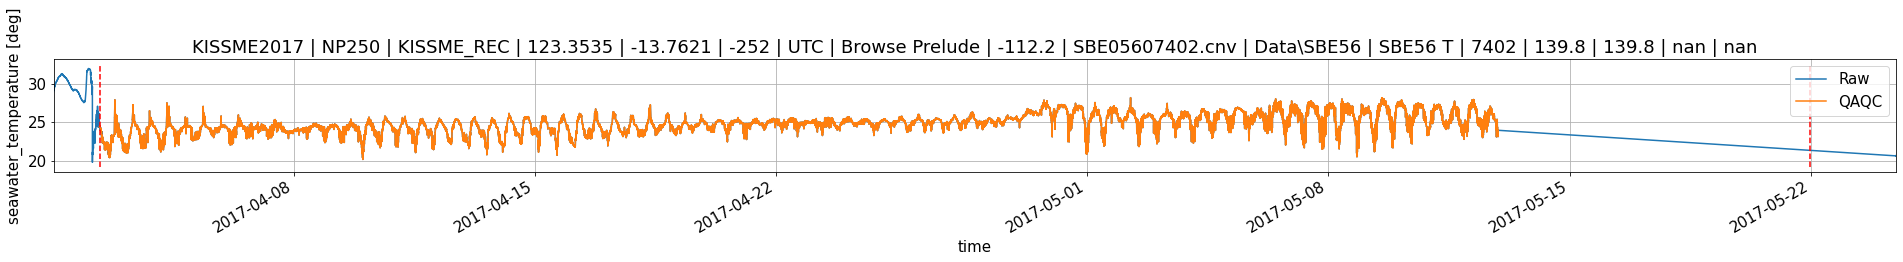

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05607403.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607403.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607403.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607403.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[14980]_[SBE56 T]_[740300]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230475 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


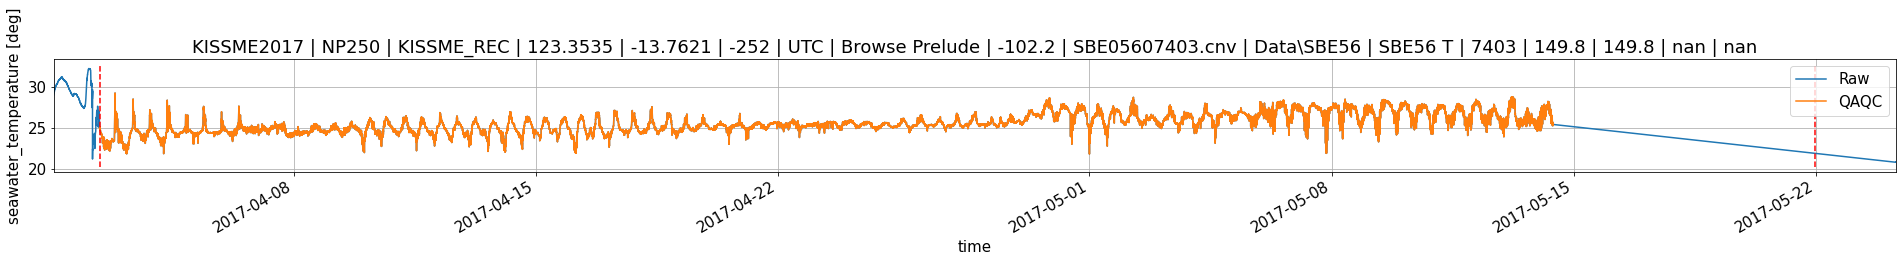

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE37\SBE37SM-12738.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE37\SBE37SM-12738.cnv...
No lat/lon stored.
Time code timeS
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE37SM-12738.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE37"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE37SM-12738.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE37', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Blanking 0 values.


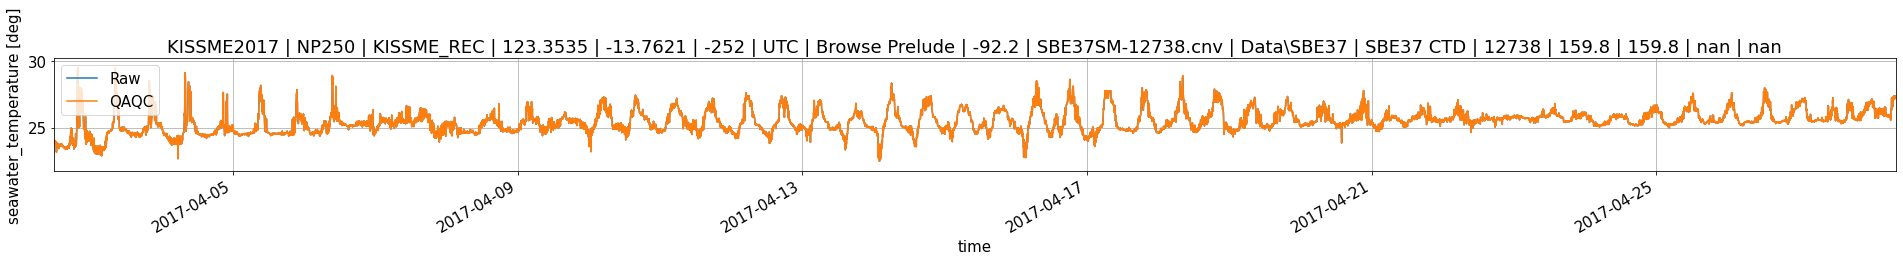

E:\Experiments\kissme17\Data\SBE56\SBE05607426.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607426.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607426.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607426.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[16980]_[SBE56 T]_[742600]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230456 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


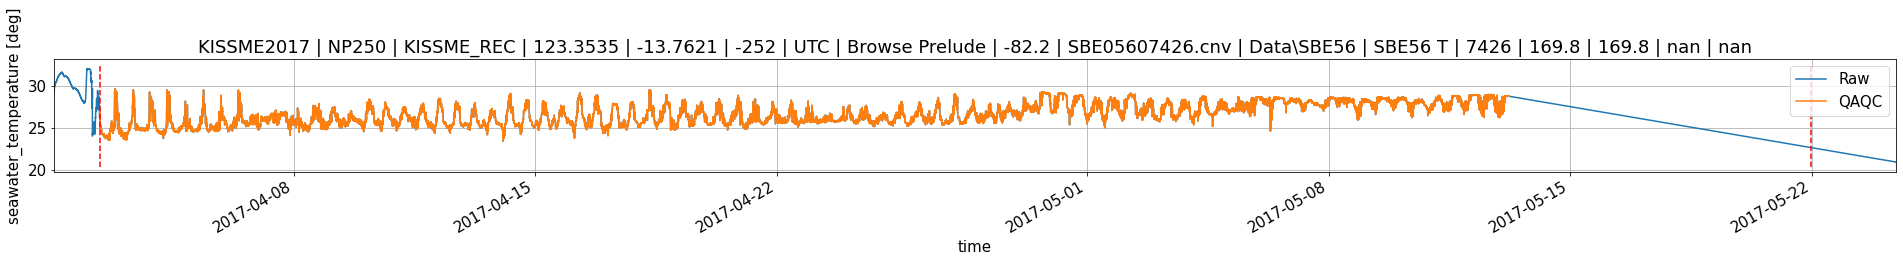

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE056_00973_2017-05-24.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE056_00973_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE056_00973_2017-05-24.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE056_00973_2017-05-24.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[17980]_[SBE56 T]_[97300]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230402 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


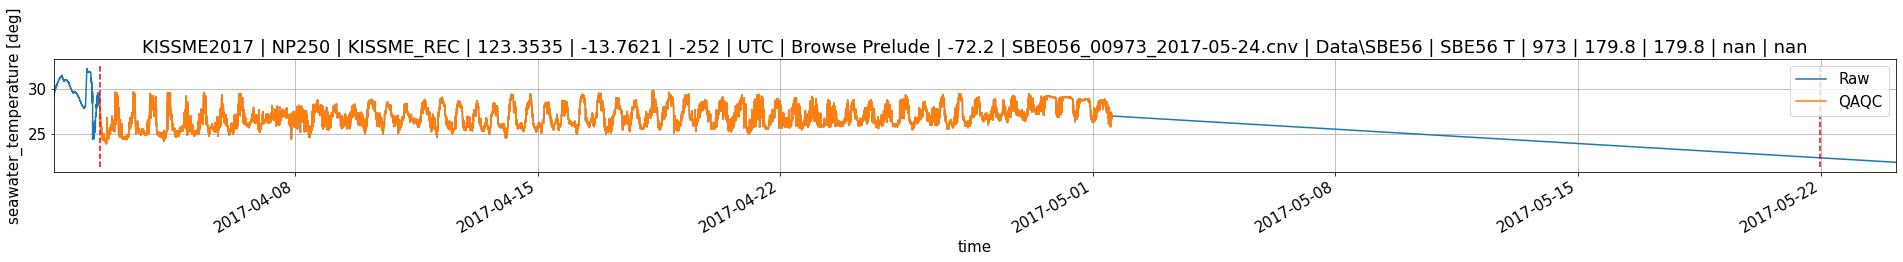

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE056_00987_2017-05-24.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE056_00987_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE056_00987_2017-05-24.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE056_00987_2017-05-24.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[18980]_[SBE56 T]_[98700]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 235622 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


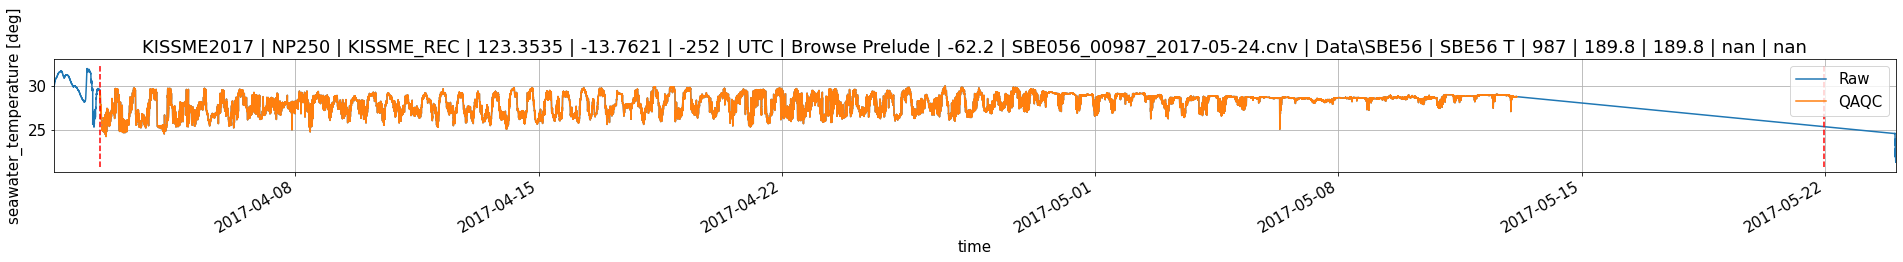

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE056_01003_2017-05-24.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE056_01003_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE056_01003_2017-05-24.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE056_01003_2017-05-24.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 596425 values.


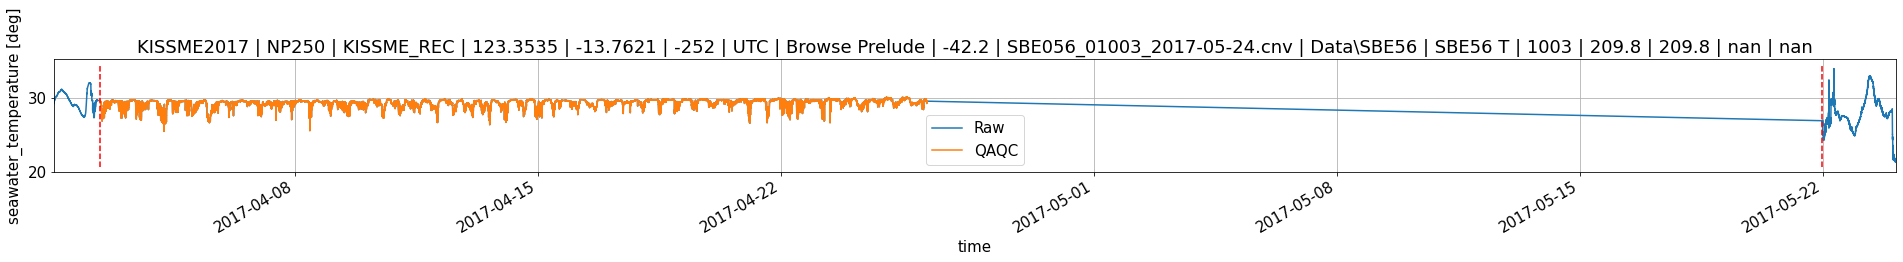

E:\Experiments\kissme17\Data\SBE56\SBE056_01015_2017-05-24.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE056_01015_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE056_01015_2017-05-24.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE056_01015_2017-05-24.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[NP250]_[21980]_[SBE56 T]_[101500]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230402 values.


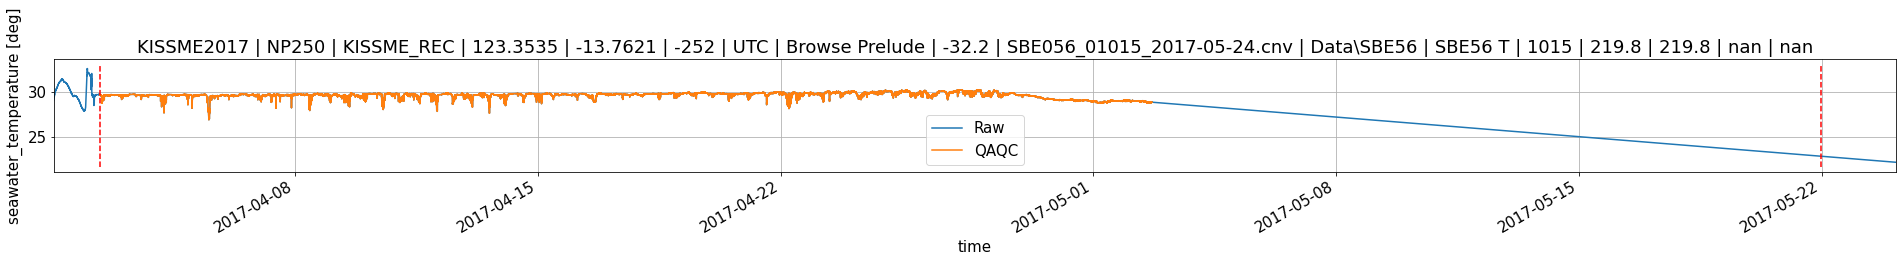

E:\Experiments\kissme17\Data\SBE37\SBE37SM-9276.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE37\SBE37SM-9276.cnv...
No lat/lon stored.
Time code timeS
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE37SM-9276.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE37"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE37SM-9276.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE37', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nomi

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 0 values.


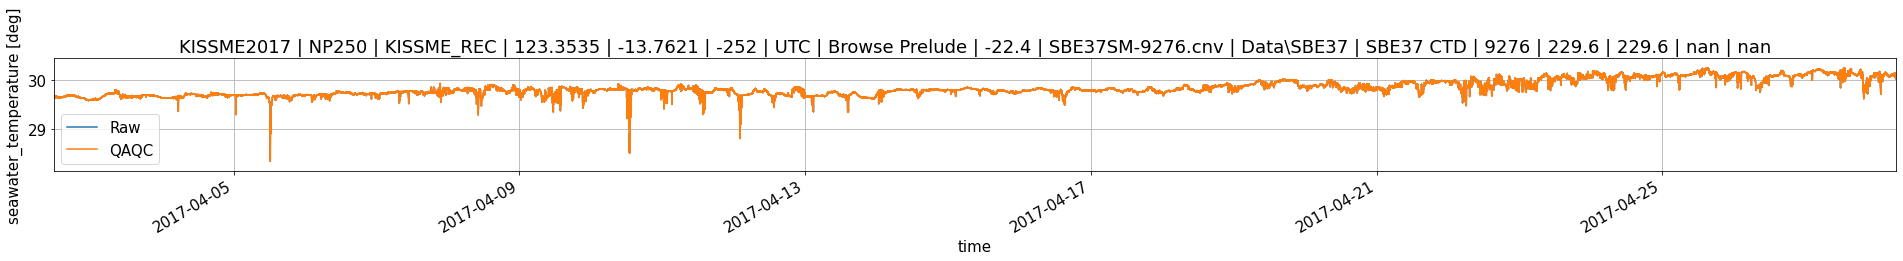

E:\Experiments\kissme17\Data\SBE56\SBE05607372.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607372.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607372.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607372.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[330]_[SBE56 T]_[737200]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 162864 values.


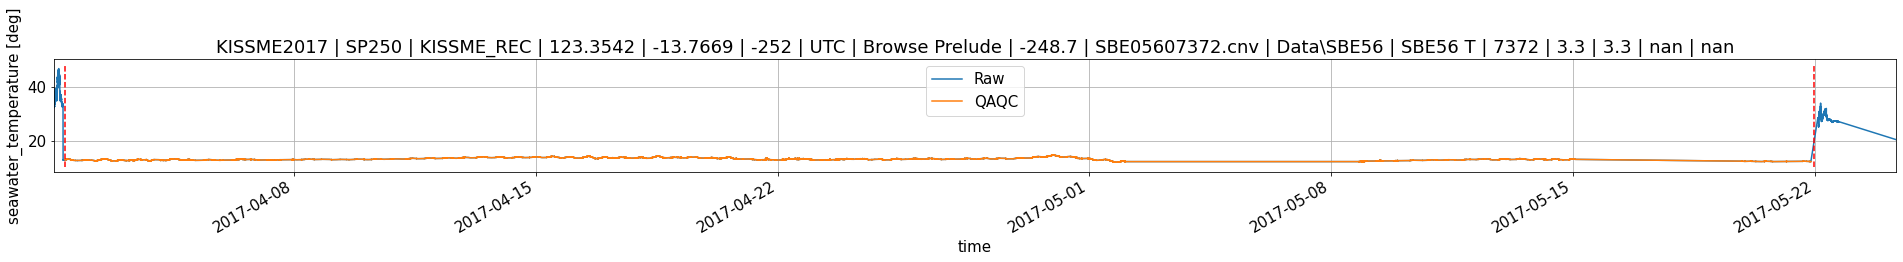

E:\Experiments\kissme17\Data\SBE56\SBE05600674.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600674.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600674.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600674.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 470301 values.


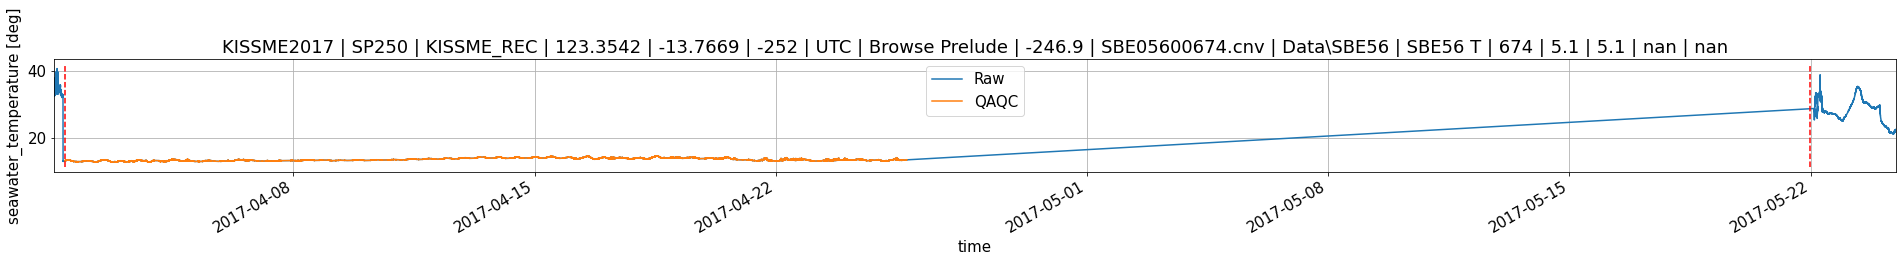

E:\Experiments\kissme17\Data\SBE56\SBE05600711.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600711.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600711.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600711.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 433699 values.


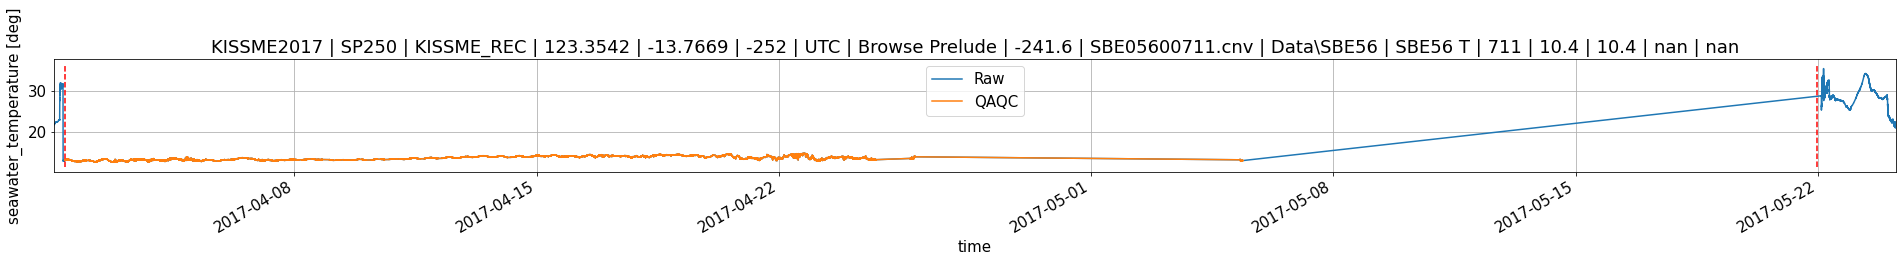

E:\Experiments\kissme17\Data\SBE56\SBE05600725.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600725.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600725.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600725.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[2039]_[SBE56 T]_[72500]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 88834 values.


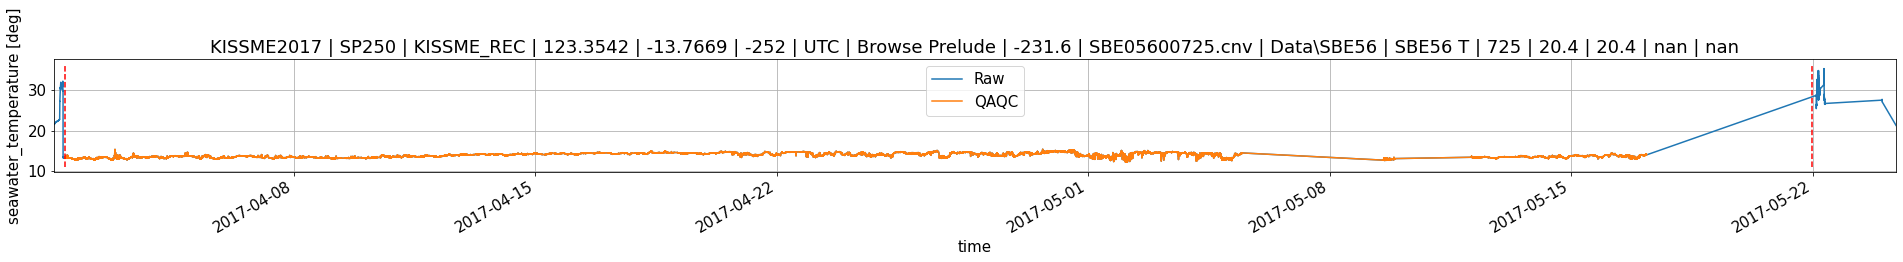

E:\Experiments\kissme17\Data\SBE56\SBE05600781.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600781.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600781.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600781.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 57601 values.


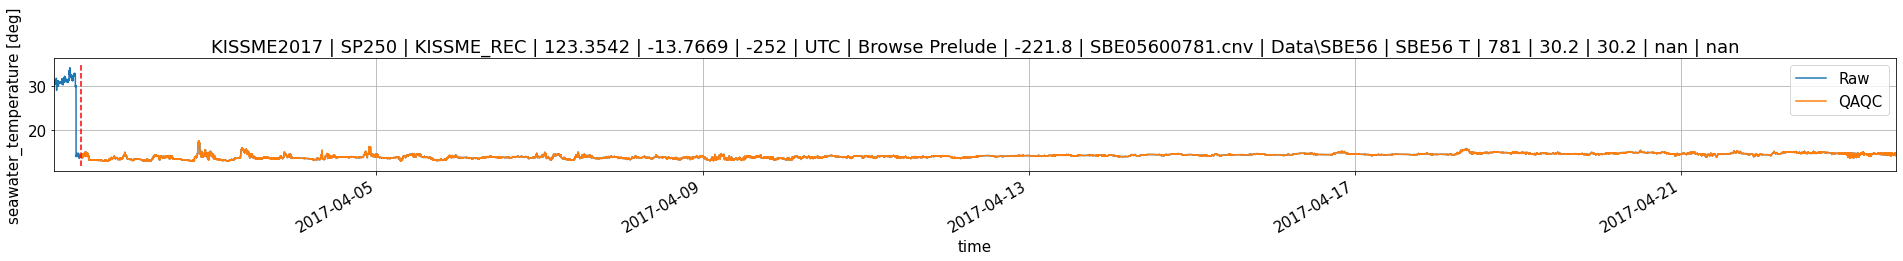

E:\Experiments\kissme17\Data\SBE56\SBE05600877.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600877.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600877.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600877.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 477559 values.


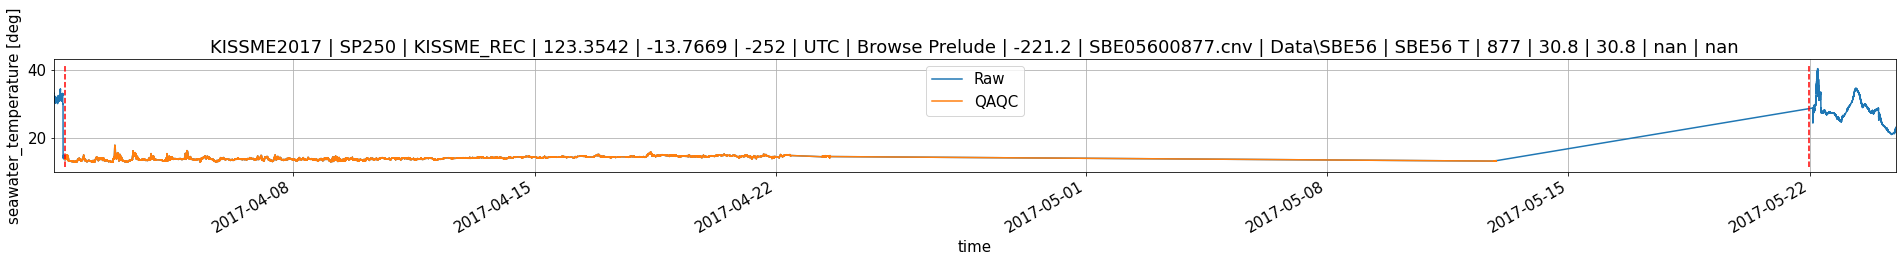

E:\Experiments\kissme17\Data\SBE56\SBE05600878.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600878.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600878.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600878.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[3140]_[SBE56 T]_[87800]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 441048 values.


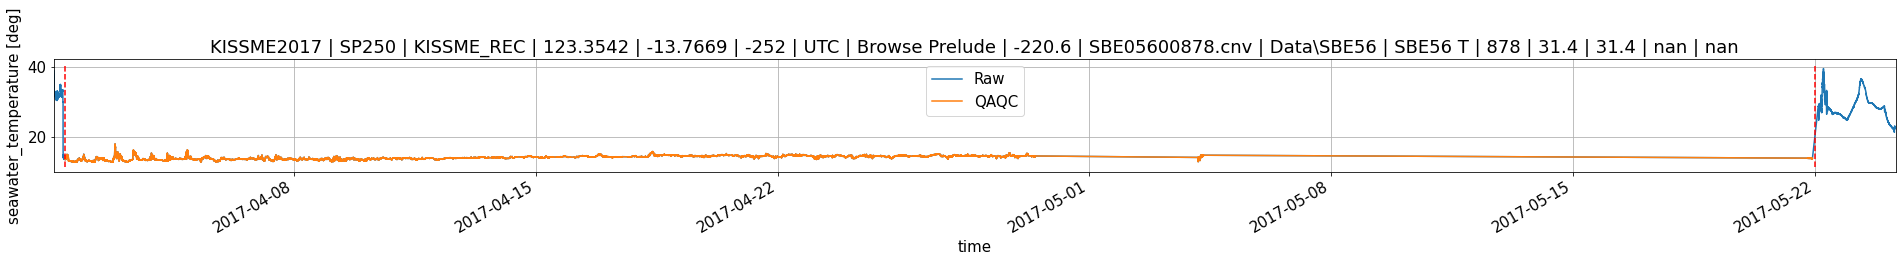

E:\Experiments\kissme17\Data\SBE56\SBE05600879.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600879.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600879.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600879.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[4020]_[SBE56 T]_[87900]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 157886 values.


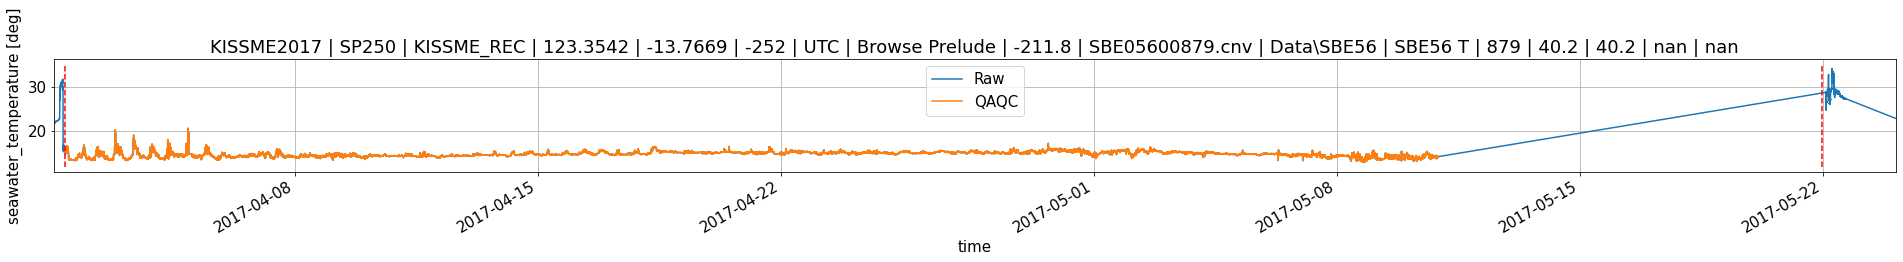

E:\Experiments\kissme17\Data\SBE56\SBE05600881.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600881.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600881.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600881.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[5020]_[SBE56 T]_[88100]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57681 values.


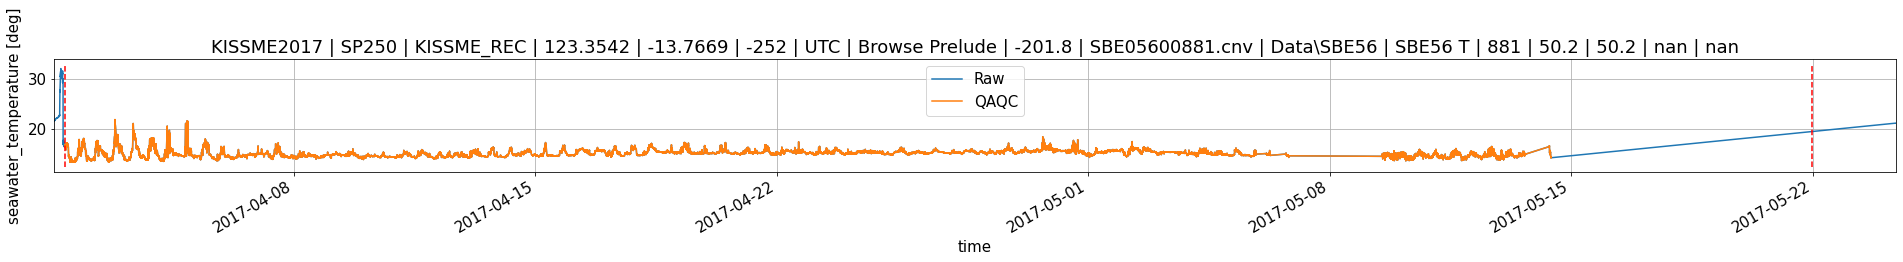

E:\Experiments\kissme17\Data\SBE56\SBE05600907.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600907.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600907.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600907.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[6020]_[SBE56 T]_[90700]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57672 values.


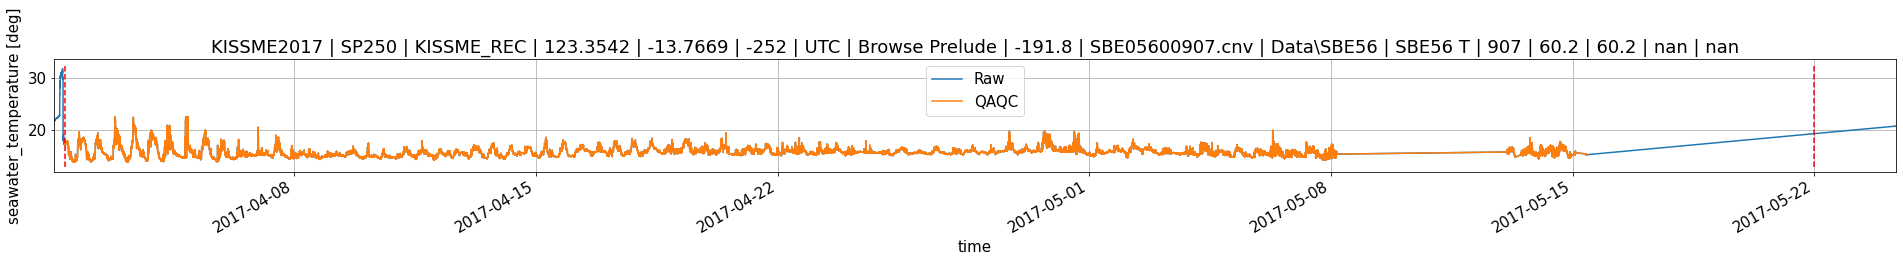

E:\Experiments\kissme17\Data\SBE56\SBE05600908.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600908.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600908.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600908.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 429622 values.


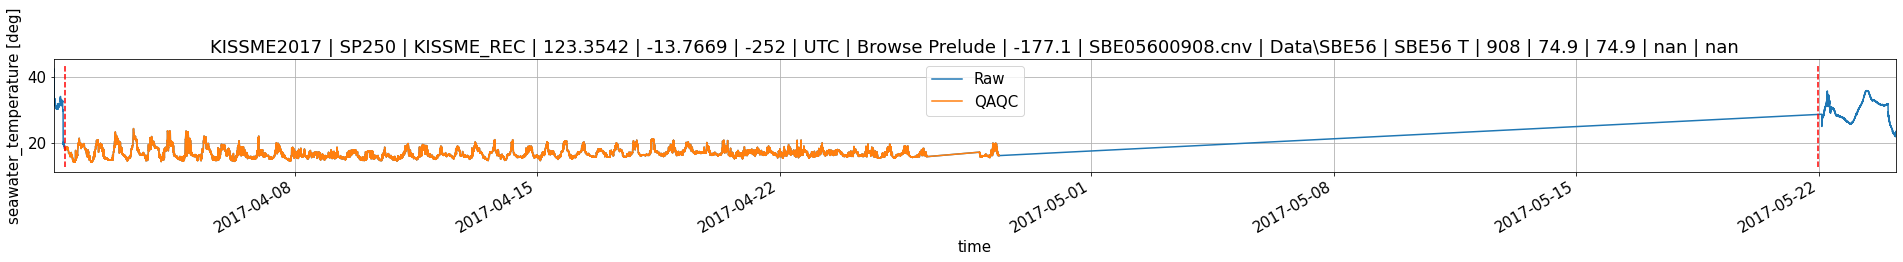

E:\Experiments\kissme17\Data\SBE56\SBE05600909.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600909.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600909.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600909.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[7570]_[SBE56 T]_[90900]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


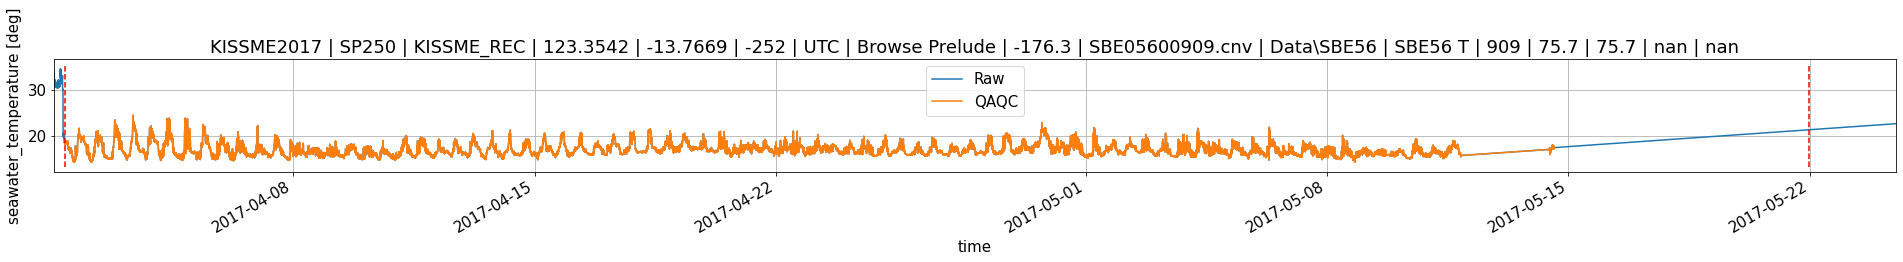

E:\Experiments\kissme17\Data\SBE56\SBE05600910.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600910.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600910.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600910.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 394863 values.


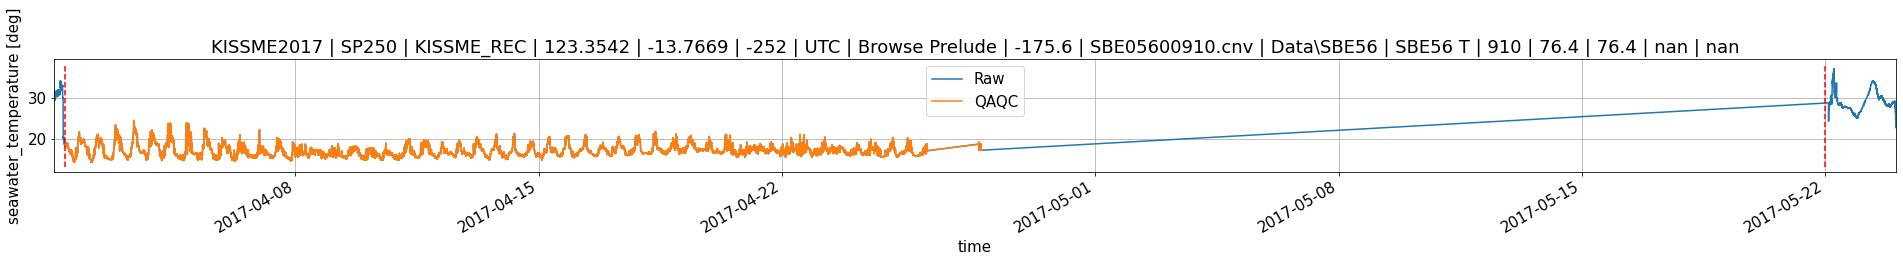

E:\Experiments\kissme17\Data\SBE56\SBE05600912.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05600912.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05600912.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05600912.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[8040]_[SBE56 T]_[91200]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


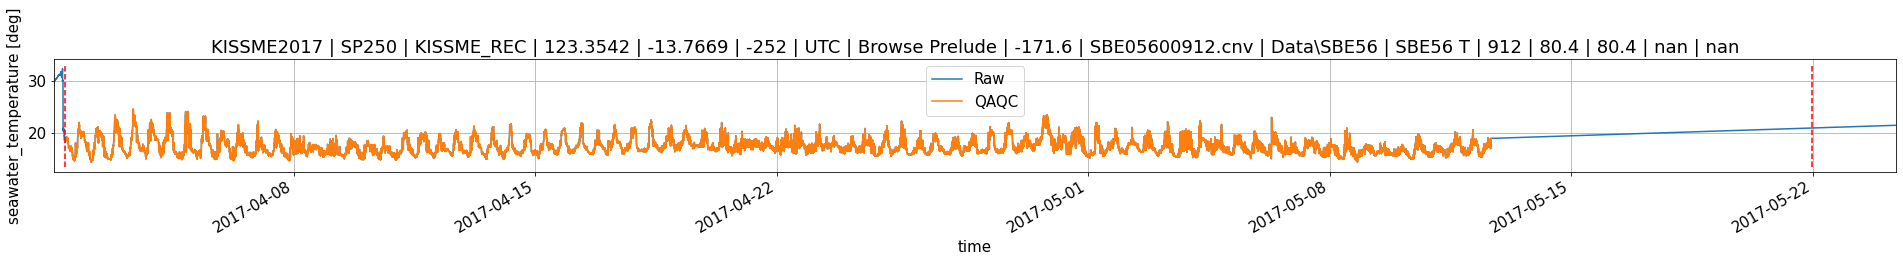

E:\Experiments\kissme17\Data\SBE56\SBE05602975.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05602975.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05602975.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05602975.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[9040]_[SBE56 T]_[297500]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


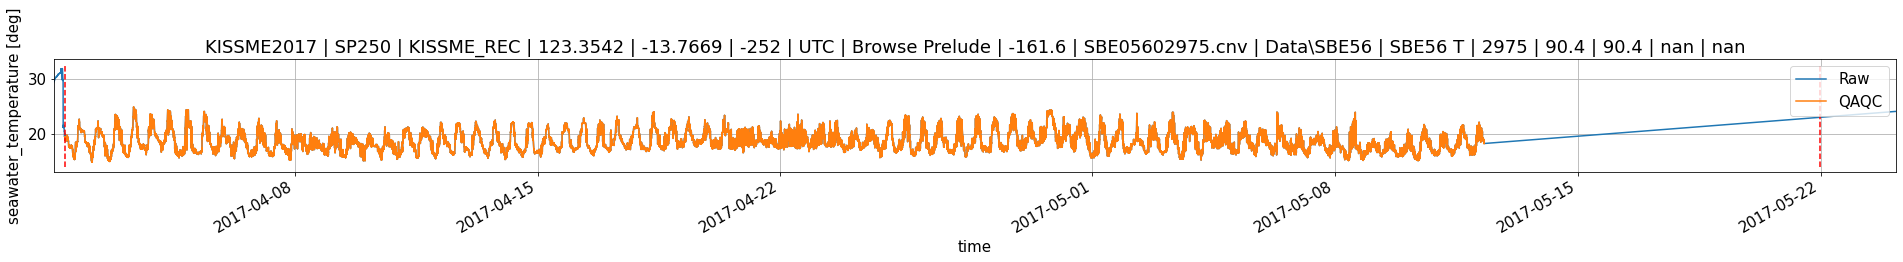

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05602976.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05602976.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05602976.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05602976.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[10040]_[SBE56 T]_[297600]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57609 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


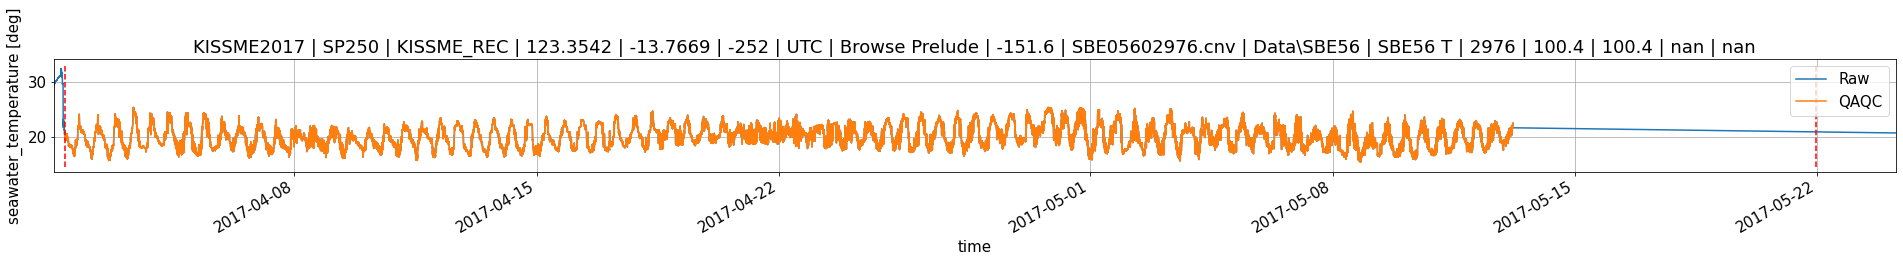

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05602977.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05602977.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05602977.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05602977.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[11040]_[SBE56 T]_[297700]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57656 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


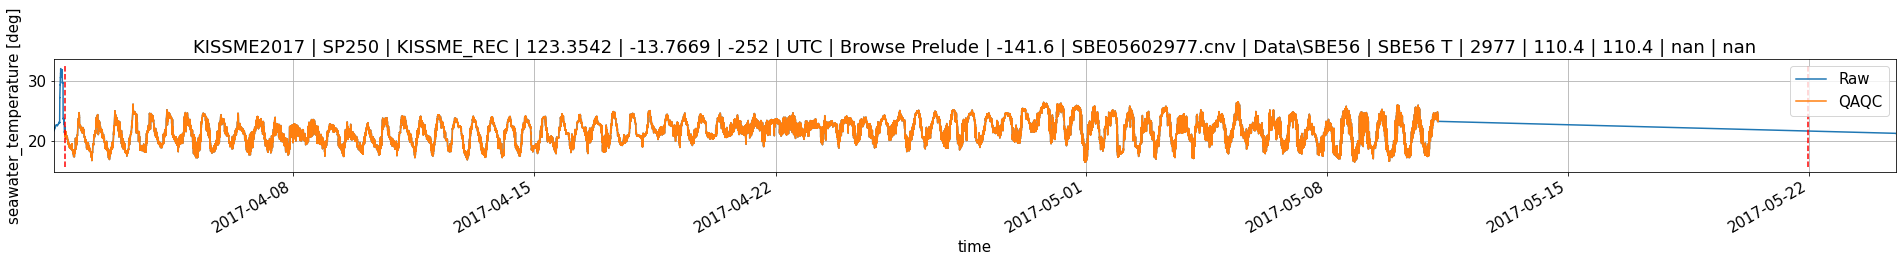

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05602978.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05602978.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05602978.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05602978.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[12040]_[SBE56 T]_[297800]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


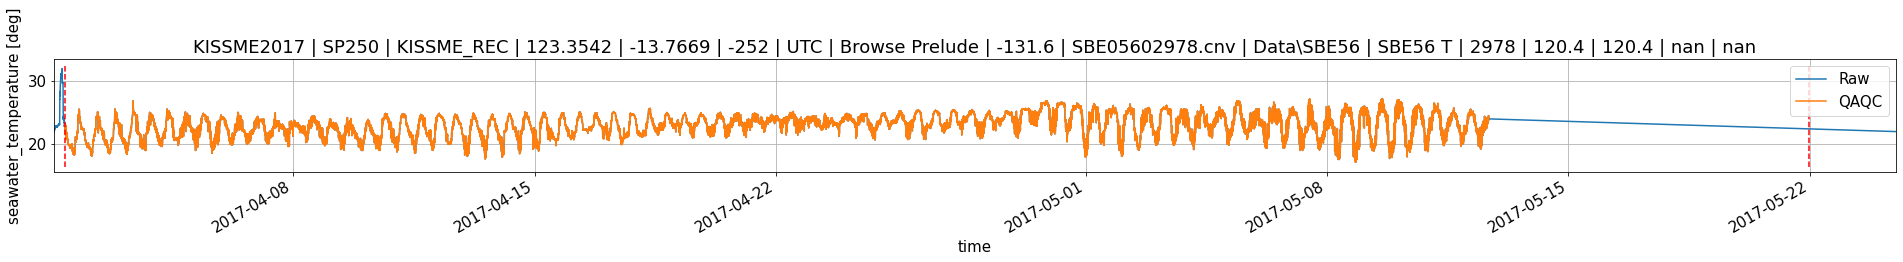

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05602981.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05602981.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05602981.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05602981.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[13040]_[SBE56 T]_[298100]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


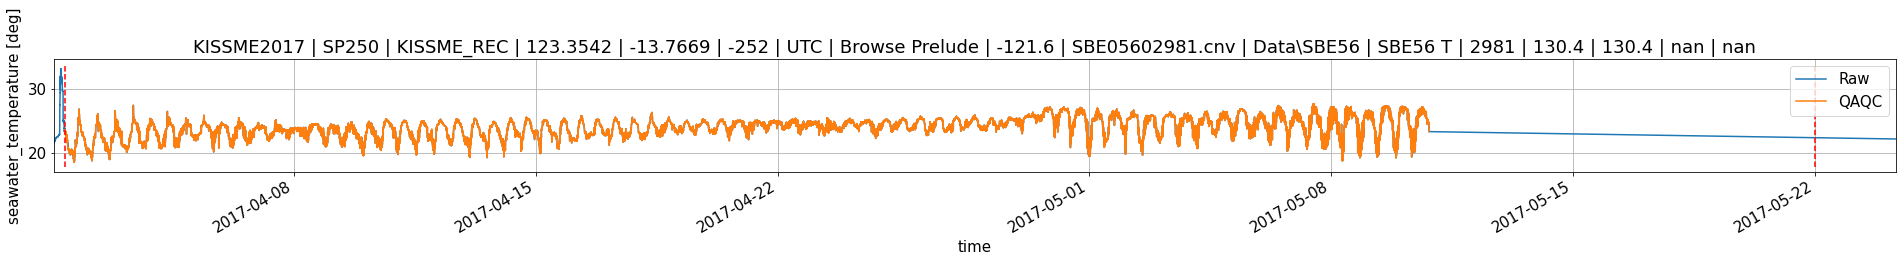

E:\Experiments\kissme17\Data\SBE56\SBE05602983.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05602983.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05602983.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05602983.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[14040]_[SBE56 T]_[298300]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


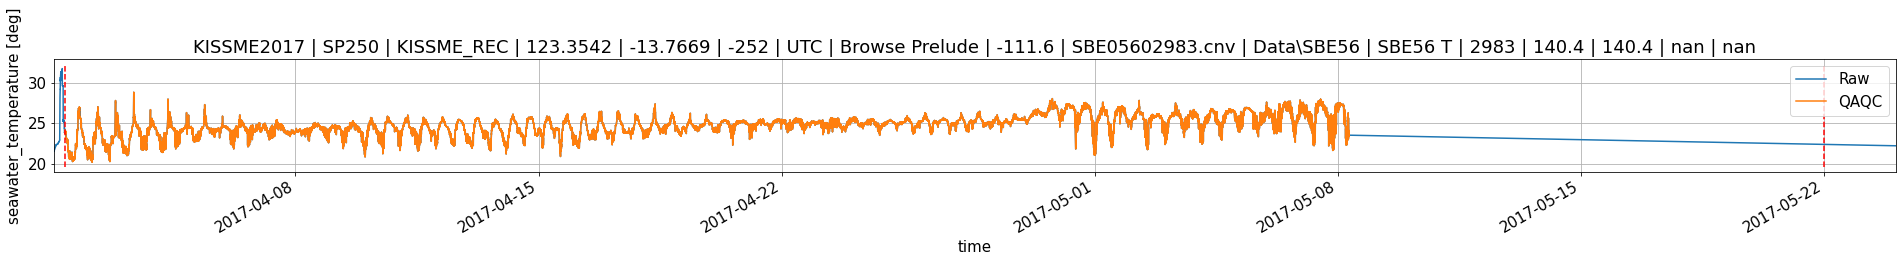

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05606964.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05606964.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05606964.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05606964.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[15040]_[SBE56 T]_[696400]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


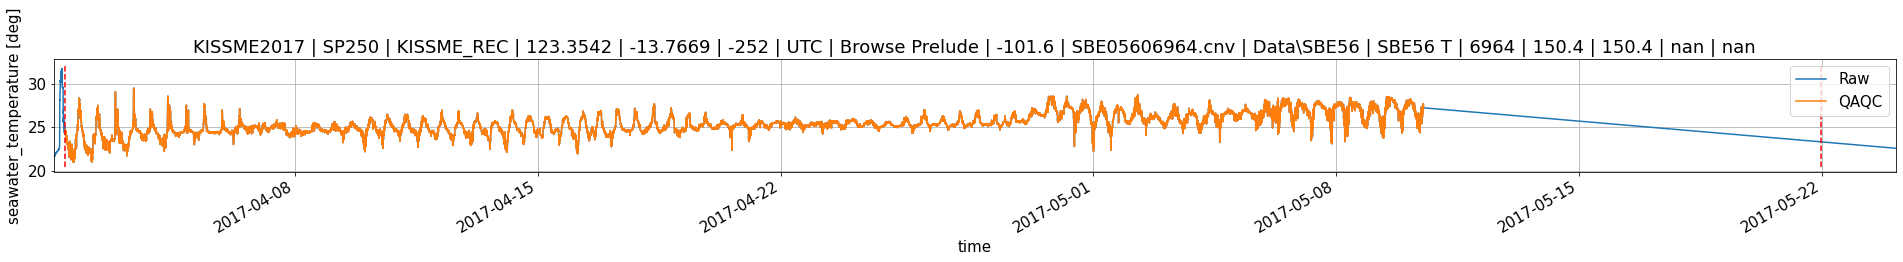

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05606965.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05606965.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05606965.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05606965.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[17040]_[SBE56 T]_[696500]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57676 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


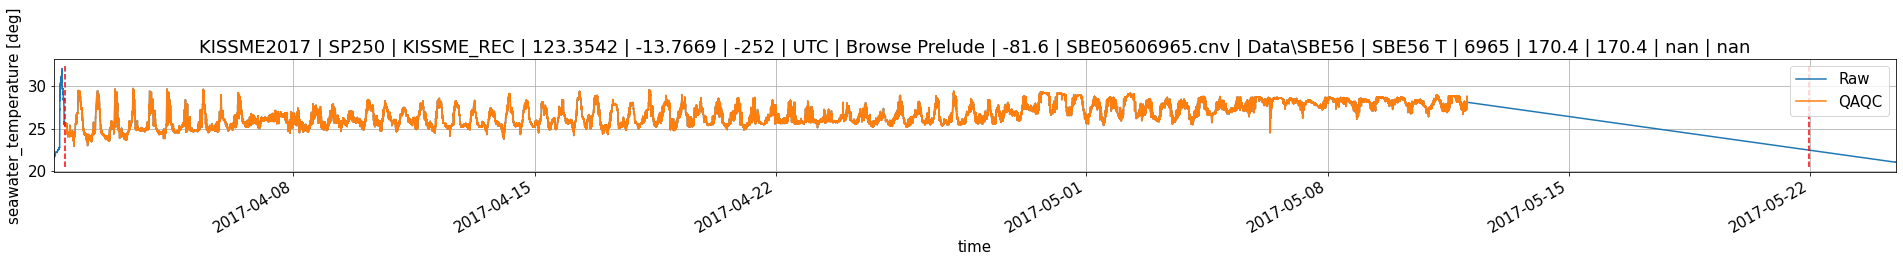

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05607274.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607274.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607274.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607274.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[18040]_[SBE56 T]_[727400]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57653 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


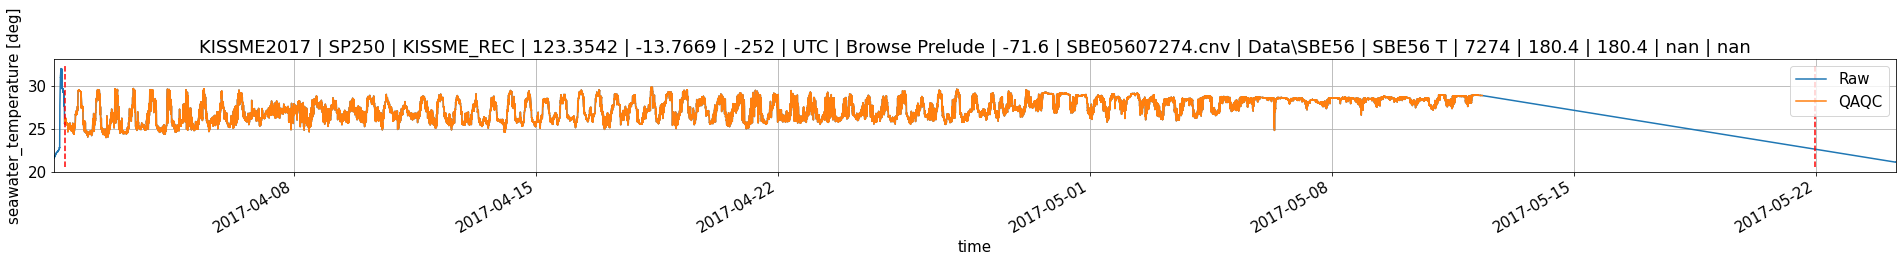

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05607308.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607308.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607308.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607308.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250]_[19040]_[SBE56 T]_[730800]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


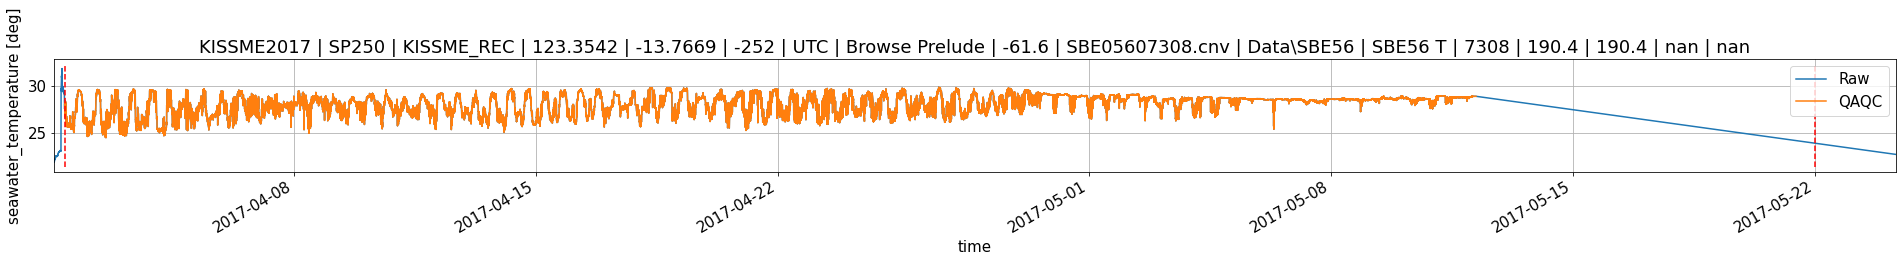

<ipython-input-11-5d4c43d7ee4c>:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(png_path + '.png', dpi=300)


E:\Experiments\kissme17\Data\SBE56\SBE05607319.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607319.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607319.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607319.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 446988 values.


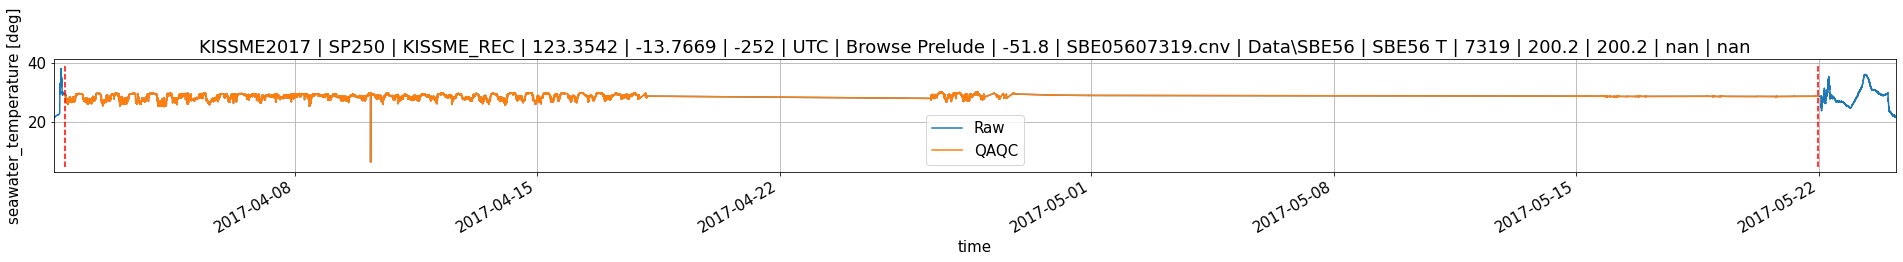

E:\Experiments\kissme17\Data\SBE56\SBE05607338.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607338.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607338.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607338.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 458689 values.


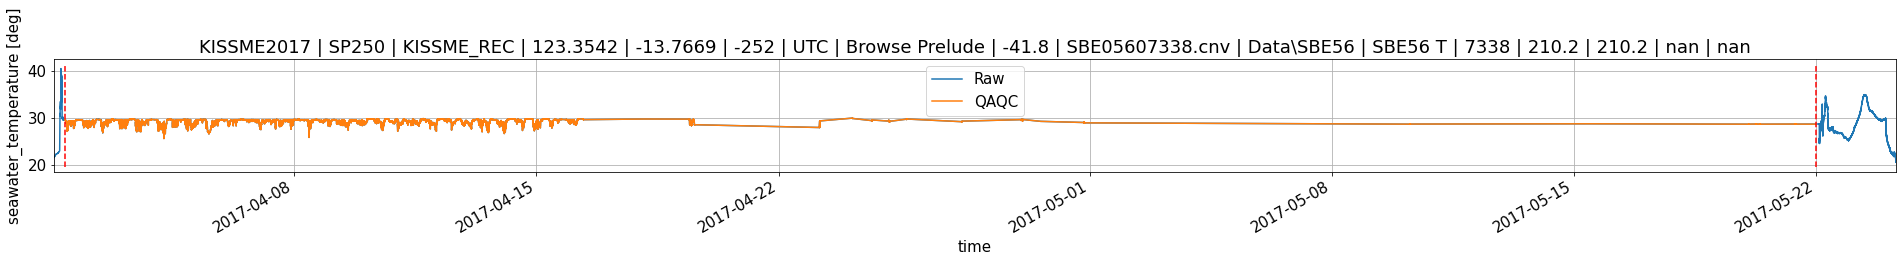

E:\Experiments\kissme17\Data\SBE56\SBE05607339.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607339.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607339.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607339.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 487721 values.


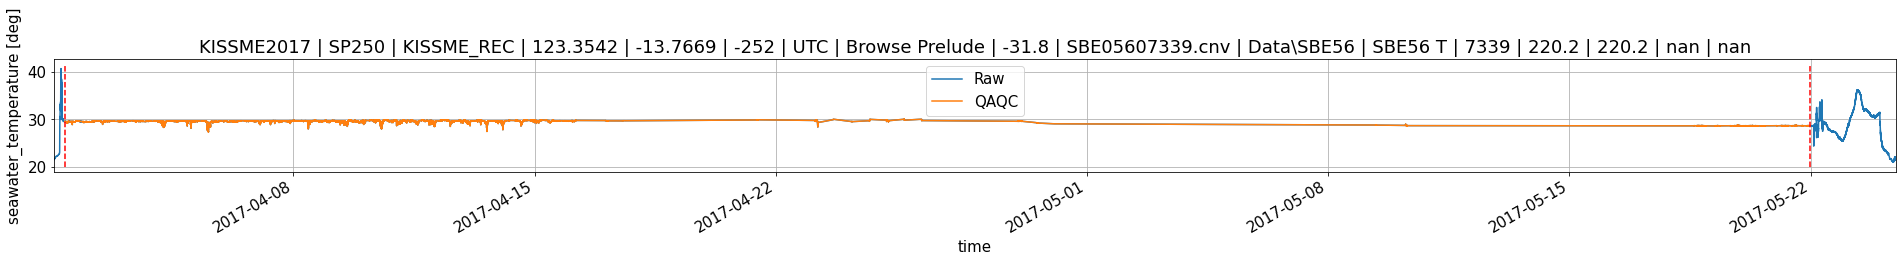

E:\Experiments\kissme17\Data\SBE56\SBE056_01270_2017-05-24.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE056_01270_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE056_01270_2017-05-24.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE056_01270_2017-05-24.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[5]_[SBE56 T]_[127000]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 113837 values.


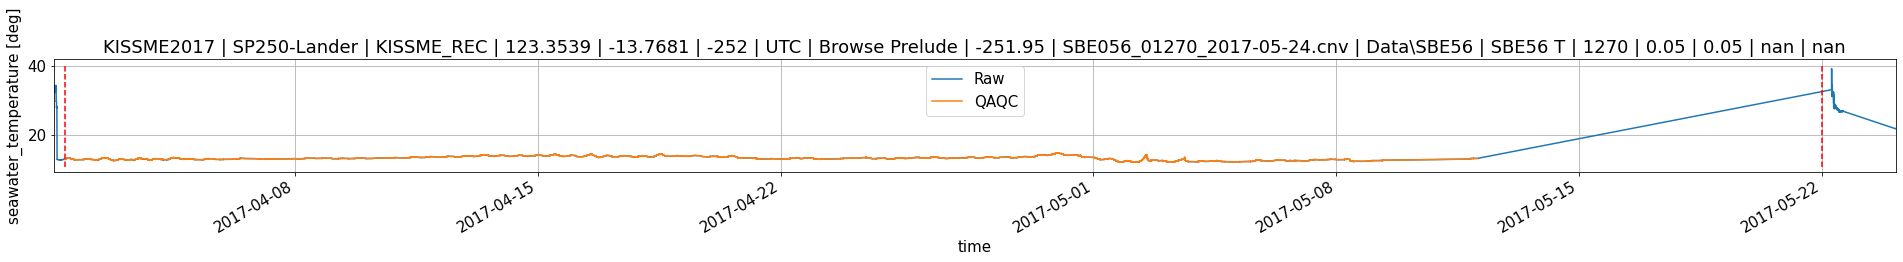

E:\Experiments\kissme17\Data\SBE56\SBE05607340.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607340.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607340.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607340.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[296]_[SBE56 T]_[734000]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


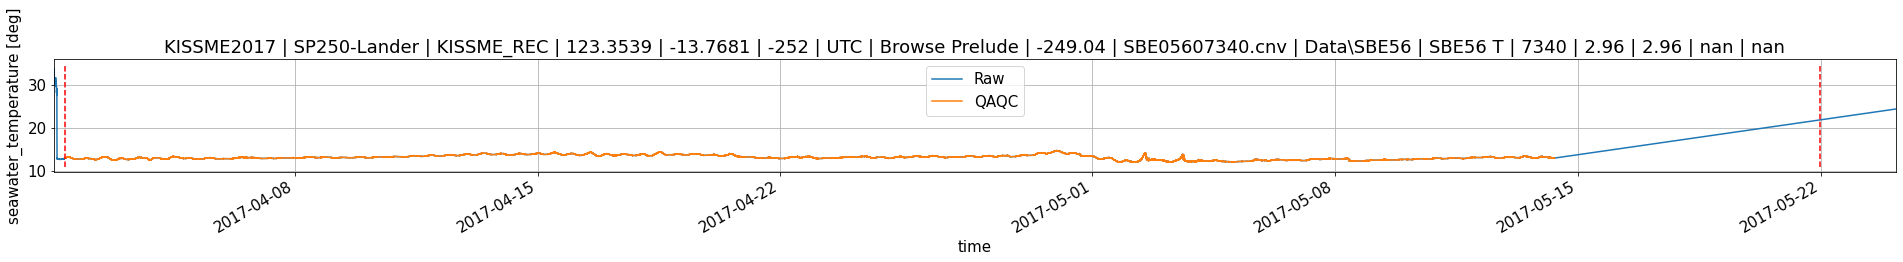

E:\Experiments\kissme17\Data\SBE56\SBE05607341.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607341.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607341.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607341.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[356]_[SBE56 T]_[734100]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57664 values.


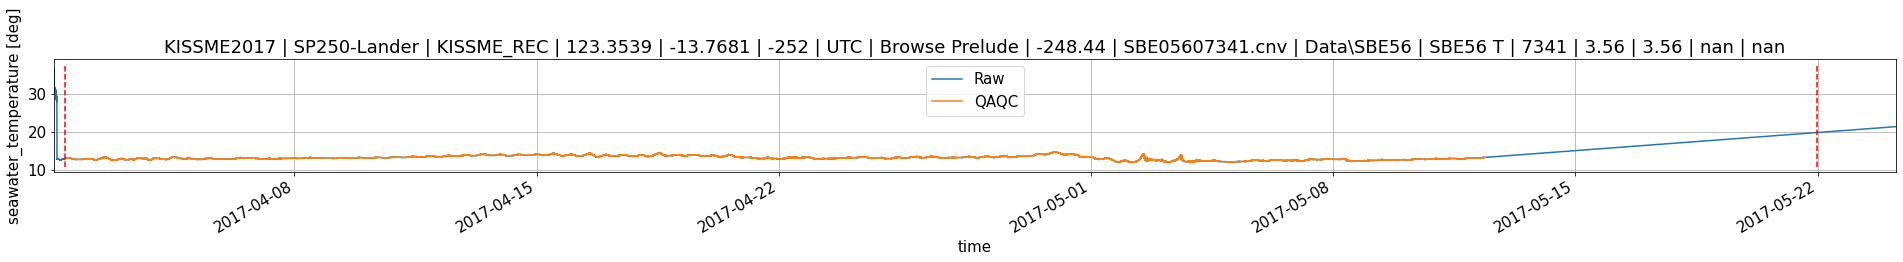

E:\Experiments\kissme17\Data\SBE56\SBE05607342.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607342.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607342.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607342.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[446]_[SBE56 T]_[734200]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57611 values.


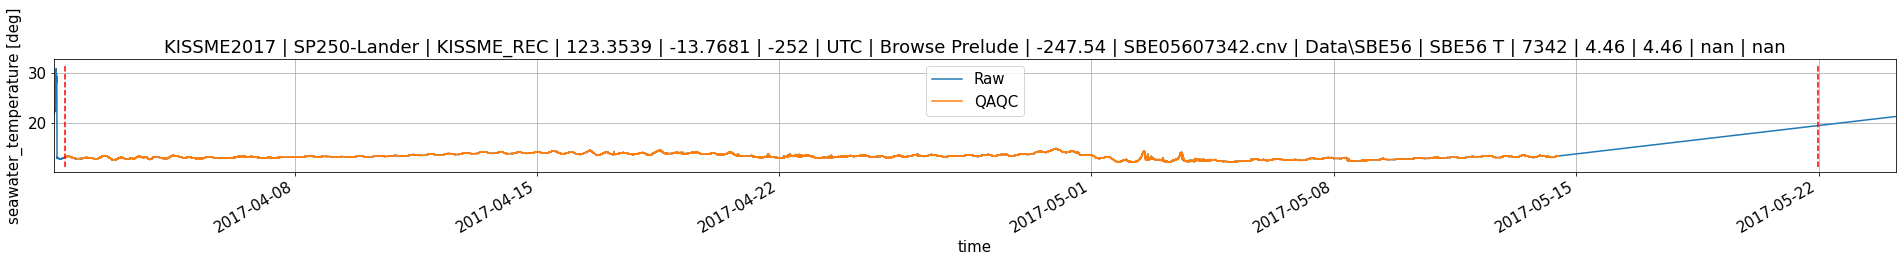

E:\Experiments\kissme17\Data\SBE56\SBE05607343.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607343.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607343.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607343.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[546]_[SBE56 T]_[734300]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


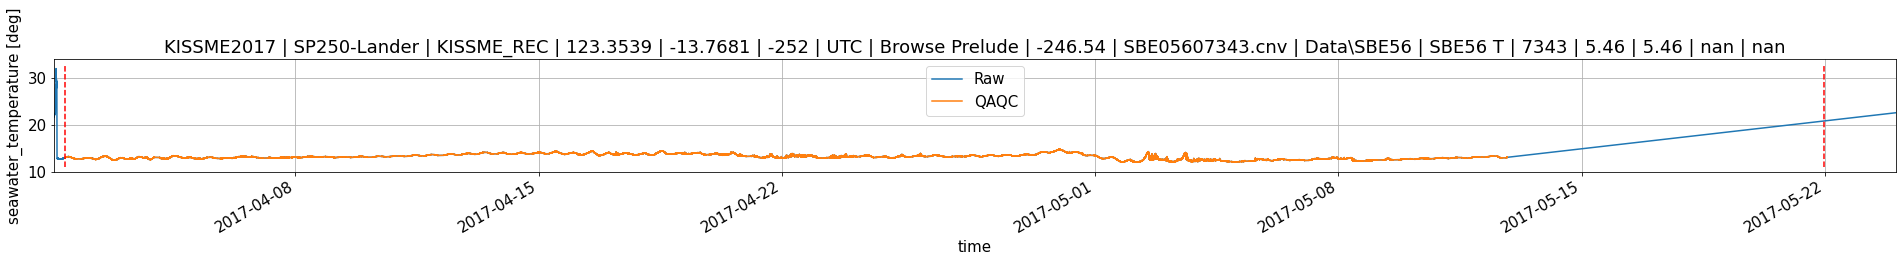

E:\Experiments\kissme17\Data\SBE56\SBE05607344.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607344.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607344.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607344.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[646]_[SBE56 T]_[734400]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57775 values.


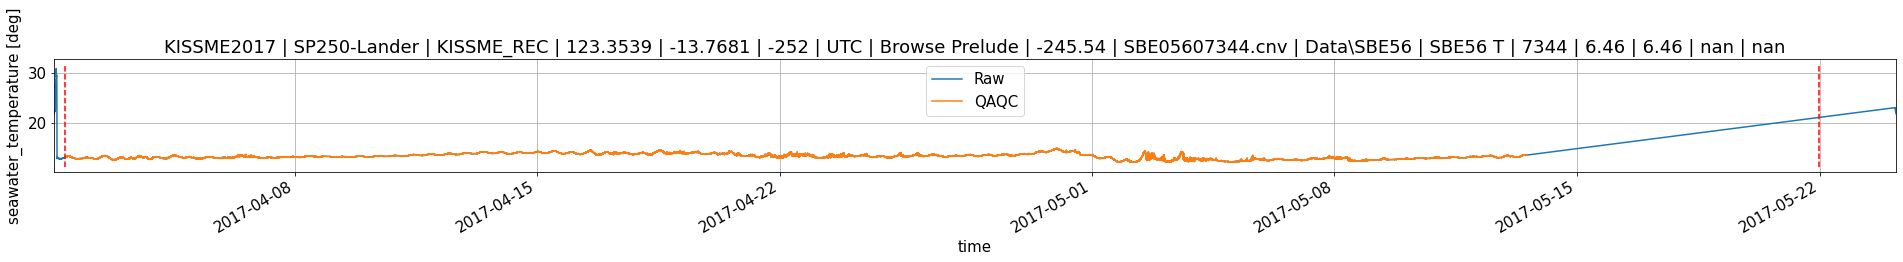

E:\Experiments\kissme17\Data\SBE56\SBE05607345.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607345.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607345.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607345.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[806]_[SBE56 T]_[734500]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57603 values.


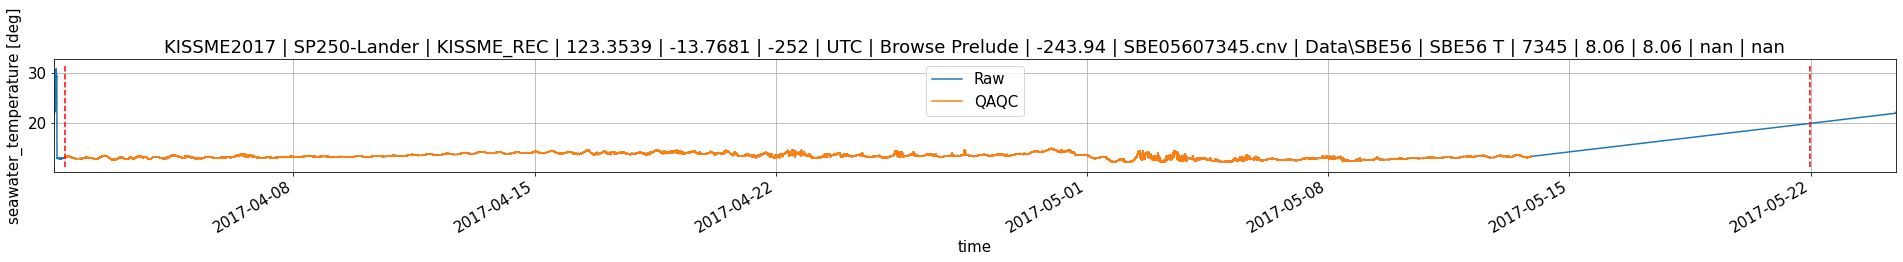

E:\Experiments\kissme17\Data\SBE56\SBE05607346.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607346.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607346.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607346.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


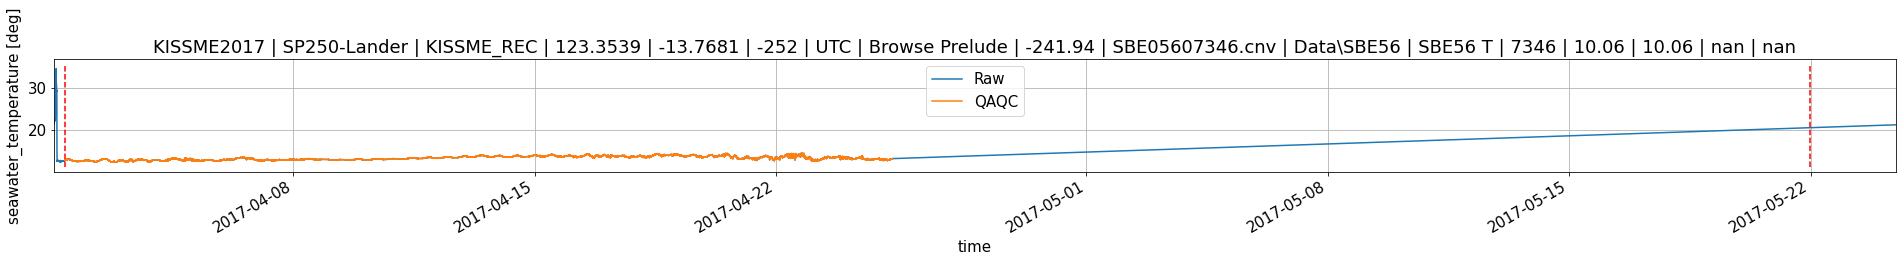

E:\Experiments\kissme17\Data\SBE56\SBE05607347.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607347.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607347.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607347.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[1206]_[SBE56 T]_[734700]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


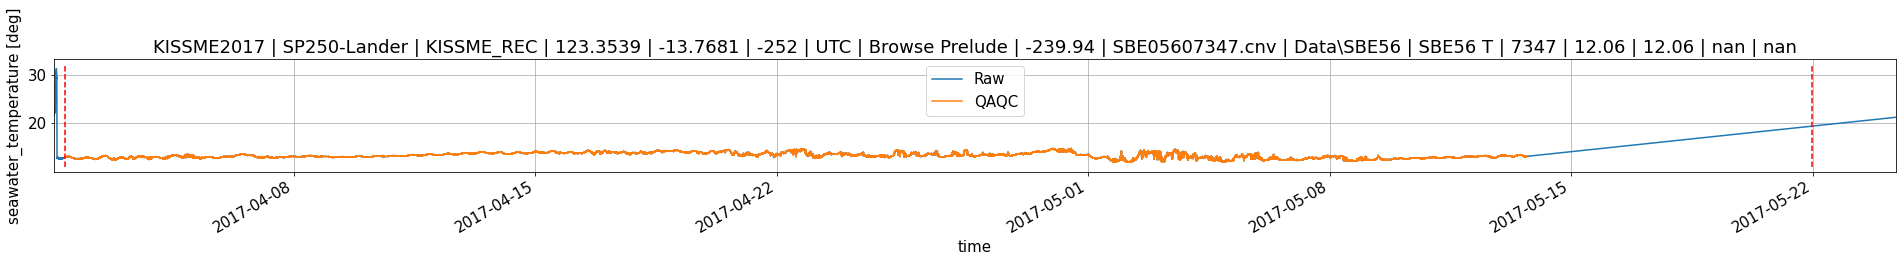

E:\Experiments\kissme17\Data\SBE56\SBE05607369.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607369.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607369.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607369.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[1416]_[SBE56 T]_[736900]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 57602 values.


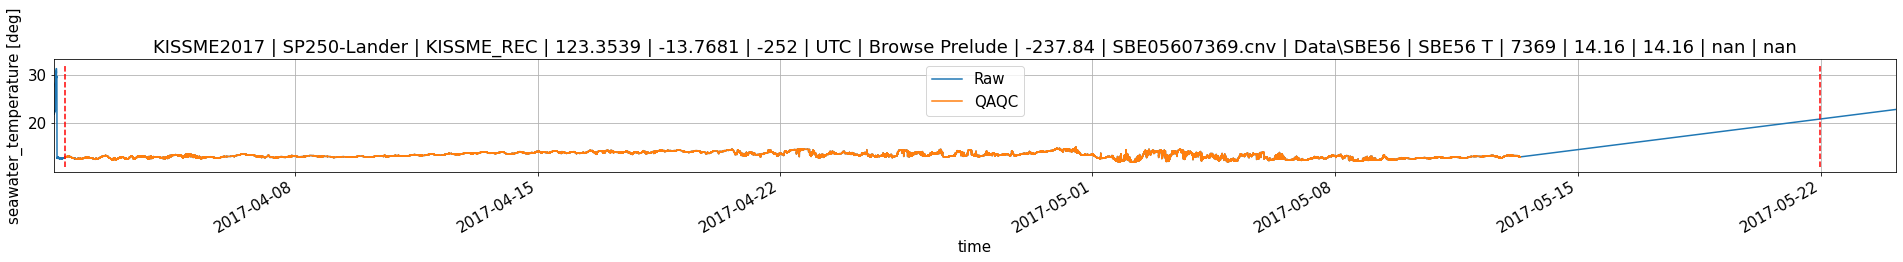

E:\Experiments\kissme17\Data\SBE56\SBE05607370.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE05607370.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE05607370.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE05607370.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', 'outfile_append': '', 'disclaimer': '', 'nominal_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[SP250-Lander]_[1616]_[SBE56 T]_[737000]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 138244 values.


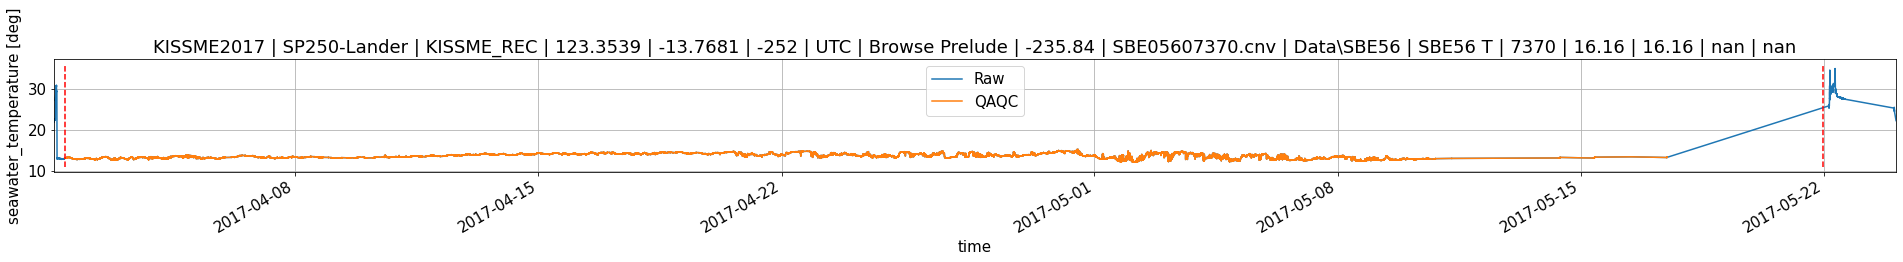

E:\Experiments\kissme17\Data\SBE56\SBE056_01247_2017-05-24.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE056_01247_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE056_01247_2017-05-24.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE056_01247_2017-05-24.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Figure size is 69.0 x 8.0 cm
Blanking 598301 values.


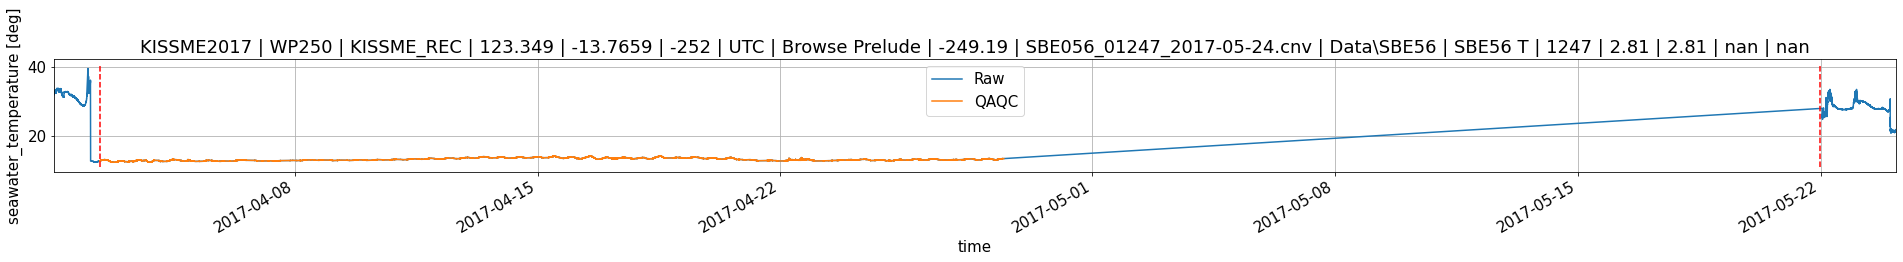

E:\Experiments\kissme17\Data\SBE56\SBE056_01017_2017-05-24.cnv
File exists
Reading CNV file:
	E:\Experiments\kissme17\Data\SBE56\SBE056_01017_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
Initialising accessor.
STORING RAW FILE ATTRIBUTES
Setting attribute "raw_file_name" to "SBE056_01017_2017-05-24.cnv"
Setting attribute "raw_file_directory" to "E:\Experiments\kissme17\Data\SBE56"
{'title': '', 'institution': 'The University of Western Australia', 'institution_division': 'Ocean Dynamics', 'source': '', 'project': '', 'history': '', 'references': '', 'comment': '', 'Conventions': 'CF-1.7', 'trip': '', 'trip_deployed': '', 'site': '', 'site_station': '', 'instrument_make': '', 'instrument_model': '', 'instrument_serial_number': '', 'raw_file_name': 'SBE056_01017_2017-05-24.cnv', 'raw_file_directory': 'E:\\Experiments\\kissme17\\Data\\SBE56', 'raw_file_attributes': '', 'last_export_file_name': '', 'last_export_directory': '', 'last_load_file_name': '', 'last_load_directory': '', '

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\SBE56
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\SBE56//[KISSME2017]_[KISSME_REC]_[WP250]_[9016]_[SBE56 T]_[101700]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 230402 values.


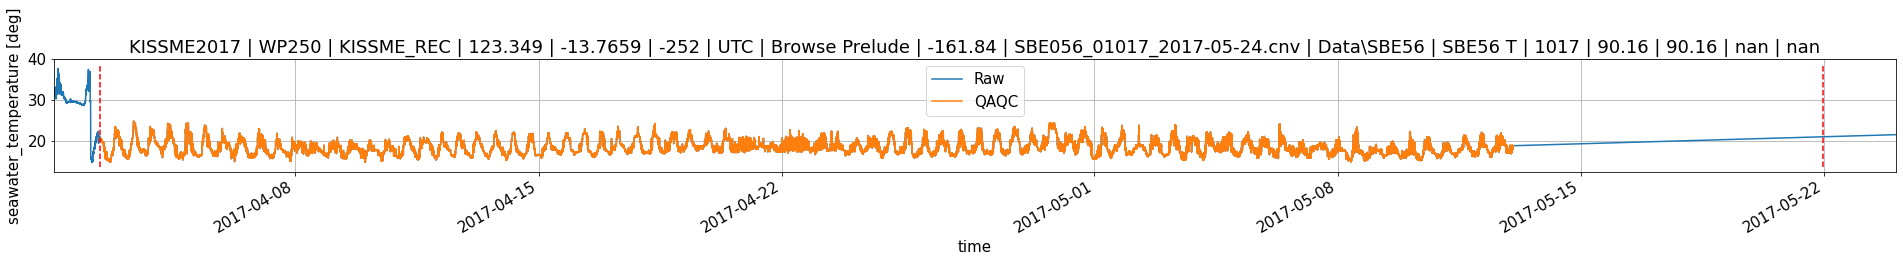

In [11]:
# raise(Exception('This must be converted to the Pandas Dataframe, not csvread.'))
# os.path.exists(csvfile)

filetypes = ['SBE56 T', 'SBE37 CTD'];
filetypes = ['SBE37 CTD'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

for index, row in db_data['deployment_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    
    attributes = ai.row_to_attrs(row)
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in filetypes:

        asc_filename = os.path.join(project_root, row['FilePath'], row['FileName'])
        print(asc_filename)

        if os.path.exists(asc_filename):
            print('File exists')
        else:
            raise(Exception)

#             mcout_asc = read_sbd.parse_seabird_cnv(asc_filename)
        folder, file = os.path.split(asc_filename)
        rr, ds = seabird_37_39_56.from_cnv(asc_filename)
        rr.update_attributes_with_dict(attributes)

#         ai.qc_impossible_date(rr, mooring, db_data)
        pqc.pimosInOutWaterQC(rr, mooring, db_data, year_1=1890)

        ai.pIMOS_export(rr, archive_dir, instrument[0:5], sn)
        fig = ai.plot_temp(rr, db_data, mooring, attributes)
        
        png_path = rr.fullpath_last_export[0:-3] +'.png'
        fig.savefig(png_path + '.png', dpi=300)        
        

# Now the TRDI instruments

Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
E:\Experiments\kissme17\Data\RDIADCP\Monitor20089\0089_000.000
File exists

Reading file E:\Experiments\kissme17\Data\RDIADCP\Monitor20089\0089_000.000 ...
<ADP data object>
  . 36.68 days (started: Mar 31, 2017 23:00)
  . beam-frame
  . (46 bins, 52820 pings @ 0.016666666666666666Hz)
  *------------
  | depth_m                  : <array; (52820,); float32>
  | mpltime                  : <array; (52820,); float64>
  | range                    : <array; (46,); float64>
  | vel                      : <array; (4, 46, 52820); float32>
  + config                   : + DATA GROUP
  + env                      : + DATA GROUP
  + orient                   : + DATA GROUP
  + props  

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\RDI 300 kHz Monitor
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\RDI 300 kHz Monitor//[KISSME2017]_[KISSME_REC]_[NP250]_[340]_[RDI 300 kHz Monitor]_[2008900]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 112011 values.


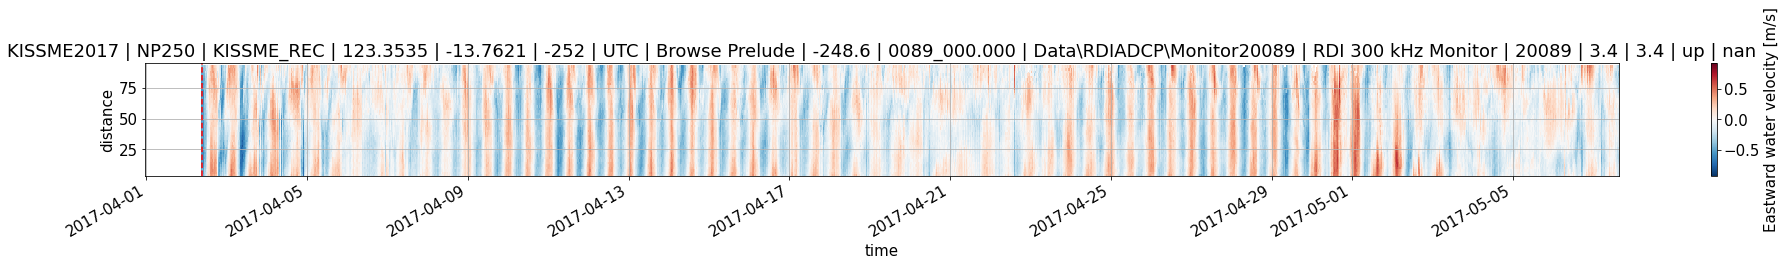

E:\Experiments\kissme17\Data\RDIADCP\QuarterMaster16856\6856_000.000
File exists

Reading file E:\Experiments\kissme17\Data\RDIADCP\QuarterMaster16856\6856_000.000 ...
<ADP data object>
  . 33.24 days (started: Mar 31, 2017 23:00)
  . beam-frame
  . (45 bins, 47869 pings @ 0.01668335001668335Hz)
  *------------
  | depth_m                  : <array; (47869,); float32>
  | mpltime                  : <array; (47869,); float64>
  | range                    : <array; (45,); float64>
  | vel                      : <array; (4, 45, 47869); float32>
  + config                   : + DATA GROUP
  + env                      : + DATA GROUP
  + orient                   : + DATA GROUP
  + props                    : + DATA GROUP
  + signal                   : + DATA GROUP
  + sys                      : + DATA GROUP

ADCP Configuration:
  *------------
  | beam_angle               : 20
  | beam_freq_khz            : 150
  | beam_pattern             : convex
  | bin1_dist_m              : 8.36
  | bin_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Trimmed sidelobe
E:\Experiments\kissme17\archive_FV01\RDI 150 kHz Quartermaster
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\RDI 150 kHz Quartermaster//[KISSME2017]_[KISSME_REC]_[NP250]_[8400]_[RDI 150 kHz Quartermaster]_[1685600]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 119824 values.


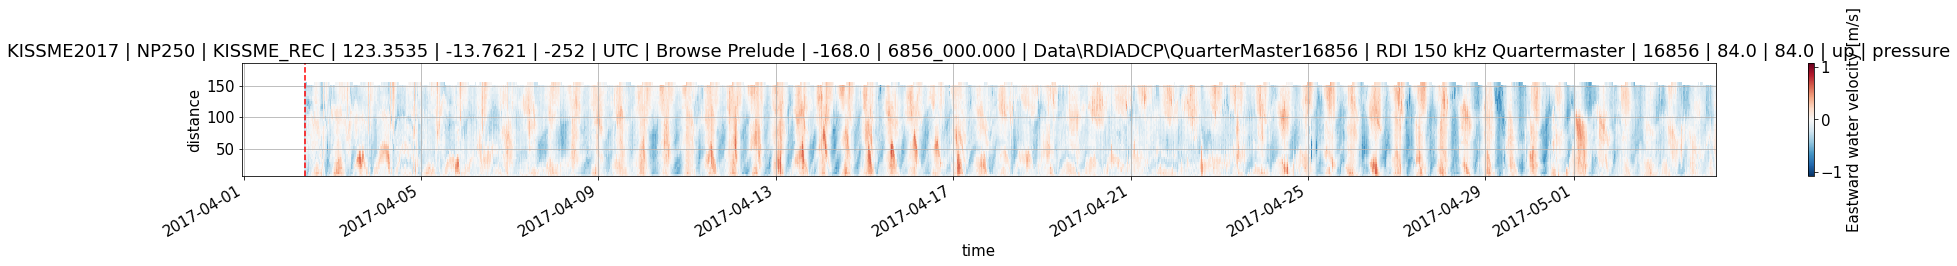

E:\Experiments\kissme17\Data\RDIADCP\LongRanger24613\LR75_000.000
File exists

Reading file E:\Experiments\kissme17\Data\RDIADCP\LongRanger24613\LR75_000.000 ...
  Encountered end of file.  Cleaning up data.
<ADP data object>
  . 52.21 days (started: Mar 31, 2017 23:00)
  . beam-frame
  . (63 bins, 72457 pings @ 0.016666666666666666Hz)
  *------------
  | depth_m                  : <array; (72457,); float32>
  | mpltime                  : <array; (72457,); float64>
  | range                    : <array; (63,); float64>
  | vel                      : <array; (4, 63, 72457); float32>
  + config                   : + DATA GROUP
  + env                      : + DATA GROUP
  + orient                   : + DATA GROUP
  + props                    : + DATA GROUP
  + signal                   : + DATA GROUP
  + sys                      : + DATA GROUP

ADCP Configuration:
  *------------
  | beam_angle               : 20
  | beam_freq_khz            : 75
  | beam_pattern             : convex
  | 

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


ND: 246.3
Trimmed sidelobe
E:\Experiments\kissme17\archive_FV01\RDI75 kHz Longranger
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\RDI75 kHz Longranger//[KISSME2017]_[KISSME_REC]_[SP250]_[570]_[RDI75 kHz Longranger]_[2461300]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 280616 values.


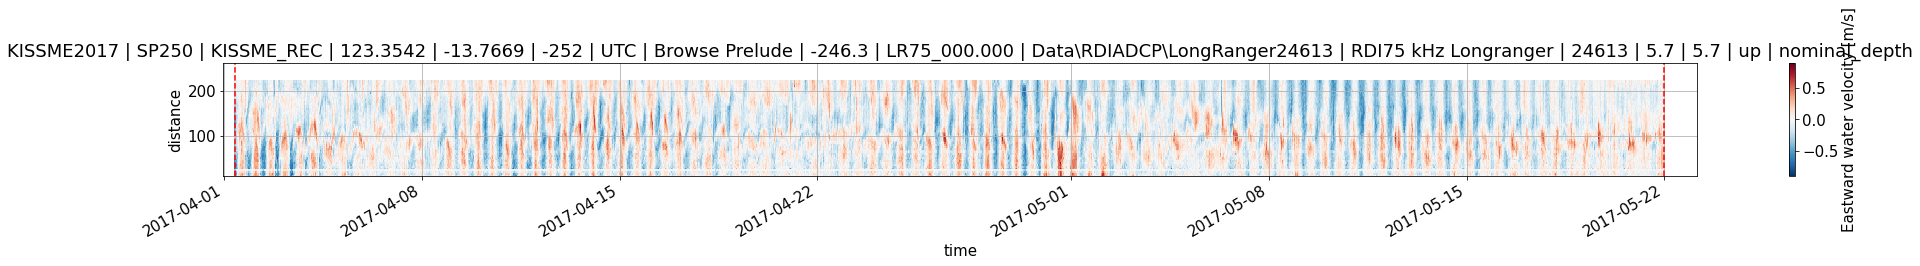

E:\Experiments\kissme17\Data\RDIADCP\Sentinel20092\LOGS_001.000
File exists

Reading file E:\Experiments\kissme17\Data\RDIADCP\Sentinel20092\LOGS_001.000 ...
<ADP data object>
  . 33.38 days (started: Mar 31, 2017 23:00)
  . beam-frame
  . (21 bins, 48067 pings @ 0.01668335001668335Hz)
  *------------
  | depth_m                  : <array; (48067,); float32>
  | mpltime                  : <array; (48067,); float64>
  | range                    : <array; (21,); float64>
  | vel                      : <array; (4, 21, 48067); float32>
  + config                   : + DATA GROUP
  + env                      : + DATA GROUP
  + orient                   : + DATA GROUP
  + props                    : + DATA GROUP
  + signal                   : + DATA GROUP
  + sys                      : + DATA GROUP

ADCP Configuration:
  *------------
  | beam_angle               : 20
  | beam_freq_khz            : 300
  | beam_pattern             : convex
  | bin1_dist_m              : 6.18
  | bin_mapping   

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


E:\Experiments\kissme17\archive_FV01\RDI 300 kHz Sentinel
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\RDI 300 kHz Sentinel//[KISSME2017]_[KISSME_REC]_[WP250]_[8950]_[RDI 300 kHz Sentinel]_[2009200]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 42866 values.


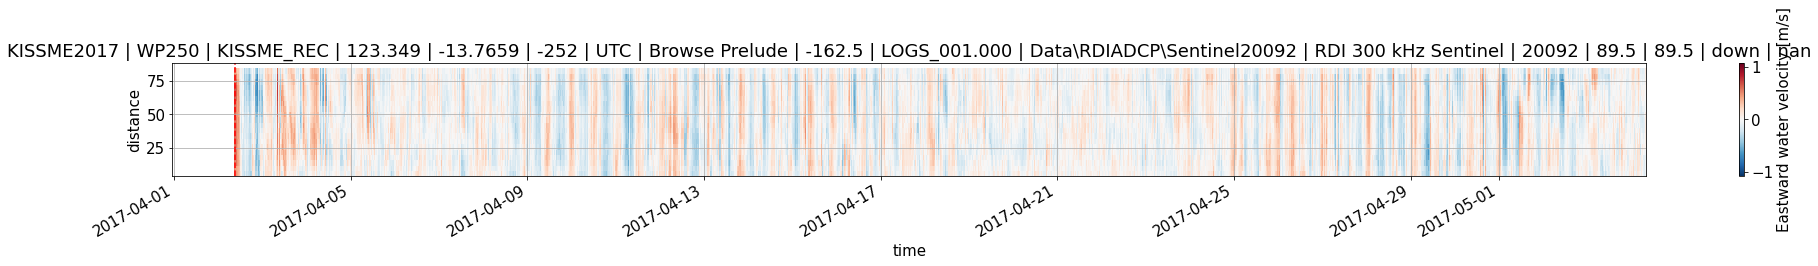

E:\Experiments\kissme17\Data\RDIADCP\QuarterMaster11795\1795_000.000
File exists

Reading file E:\Experiments\kissme17\Data\RDIADCP\QuarterMaster11795\1795_000.000 ...
<ADP data object>
  . 33.19 days (started: Mar 31, 2017 23:00)
  . beam-frame
  . (45 bins, 47791 pings @ 0.01668335001668335Hz)
  *------------
  | depth_m                  : <array; (47791,); float32>
  | mpltime                  : <array; (47791,); float64>
  | range                    : <array; (45,); float64>
  | vel                      : <array; (4, 45, 47791); float32>
  + config                   : + DATA GROUP
  + env                      : + DATA GROUP
  + orient                   : + DATA GROUP
  + props                    : + DATA GROUP
  + signal                   : + DATA GROUP
  + sys                      : + DATA GROUP

ADCP Configuration:
  *------------
  | beam_angle               : 20
  | beam_freq_khz            : 150
  | beam_pattern             : convex
  | bin1_dist_m              : 8.39
  | bin_

c:\users\azulberti\dropbox\university\phd\03_code\source_code\zutils\zutils\xrwrap.py:1058: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  vals = array.values[expand_list]


Trimmed sidelobe
E:\Experiments\kissme17\archive_FV01\RDI 150 kHz Quartermaster
Generating filename from naming convention.
Best export dir is the raw_file_directory.
Will to user input directory.
Exporting E:\Experiments\kissme17\archive_FV01\RDI 150 kHz Quartermaster//[KISSME2017]_[KISSME_REC]_[WP250]_[9130]_[RDI 150 kHz Quartermaster]_[1179500]_[].nc
Figure size is 69.0 x 8.0 cm
Blanking 129253 values.


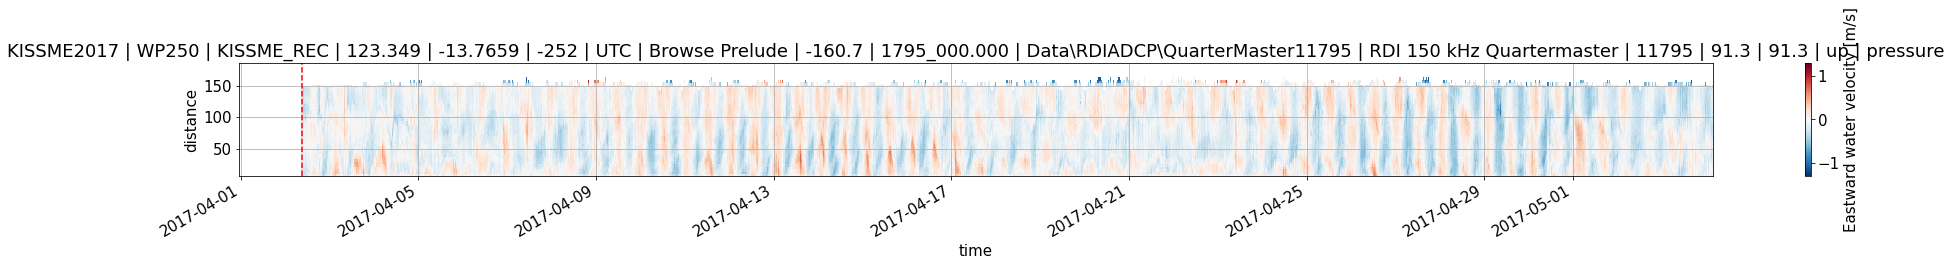

In [5]:
import zutils
import zutils.xrwrap as xrwrap
importlib.reload(zutils.xrwrap)
importlib.reload(xrwrap)

import pIMOS
import pIMOS.xrwrap.rdi_adcp as rdi_adcp 
importlib.reload(pIMOS.xrwrap.rdi_adcp)
import pIMOS.xrwrap.rdi_adcp as rdi_adcp 

filetypes = ['RDI 150 kHz Quartermaster', 'RDI 300 kHz Monitor', 'RDI75 kHz Longranger', 'RDI 300 kHz Sentinel', 'RDI 300 kHz Monitor'];
# filetypes = ['RDI 150 kHz Quartermaster'];
# filetypes = ['RDI75 kHz Longranger'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

for index, row in db_data['deployment_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    
    attributes = ai.row_to_attrs(row)
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in filetypes:

        pd0_filename = os.path.join(project_root, row['FilePath'], row['FileName'])
        print(pd0_filename)

        if os.path.exists(pd0_filename):
            print('File exists')
        else:
            raise(Exception)

        rr, ds = rdi_adcp.from_pdo(pd0_filename, rotate=True, mapbins=True)

        rr.update_attributes_with_dict(attributes)
        
        pqc.pimosInOutWaterQC(rr, mooring, db_data)
        pqc.pimosTiltVelocitySimpleQC(rr)
        pqc.pimosEchoIntensitySimpleQC(rr, thresh_1=45)
        pqc.pimosErrorVelocitySetQC(rr)
        pqc.pimosCorrMagVelocitySetQC(rr)
        pqc.pimosPercentGoodVelocitySetRDIQC(rr)

        # Keep the sidelobe interference like this for now, not using the IMOS methods.
        if not type(row['SidelobeInt'])==str:
            pass # 
        elif row['SidelobeInt'].lower() == 'pressure':
            rr._calc_sidelobe_trim()
        elif row['SidelobeInt'].lower() == 'seabed':
            rr._calc_sidelobe_trim(attributes['nominal_instrument_height_asb'])
        elif row['SidelobeInt'].lower() == 'nominal_depth':
            nd = abs(attributes['nominal_instrument_height_asb']+attributes['nominal_site_depth'])
            print('ND: {}'.format(nd))
            rr._calc_sidelobe_trim(nd)
        else:
            raise(Exception("Not recognised"))
        
        ai.pIMOS_export(rr, archive_dir, instrument, sn)
#         fig = ai.plot_temp(rr, db_data, mooring, title=' | '.join([str(i) for i in row.values]))
        fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='u',plotraw=False)

        png_path = rr.fullpath_last_export[0:-3] +'.png'
        fig.savefig(png_path, dpi=300)
                

In [2]:
rr.update_attributes_with_dict(attributes)

pqc.pimosInOutWaterQC(rr, mooring, db_data)
pqc.pimosTiltVelocitySimpleQC(rr)
pqc.pimosEchoIntensitySimpleQC(rr, thresh_1=45)
pqc.pimosErrorVelocitySetQC(rr)
pqc.pimosCorrMagVelocitySetQC(rr)
pqc.pimosPercentGoodVelocitySetRDIQC(rr)

# Keep the sidelobe interference like this for now, not using the IMOS methods.
if not type(row['SidelobeInt'])==str:
    pass # 
elif row['SidelobeInt'].lower() == 'pressure':
    rr._calc_sidelobe_trim()
elif row['SidelobeInt'].lower() == 'seabed':
    rr._calc_sidelobe_trim(attributes['nominal_instrument_height_asb'])
elif row['SidelobeInt'].lower() == 'nominal_depth':
    nd = abs(attributes['nominal_instrument_height_asb']+attributes['nominal_site_depth'])
    print('ND: {}'.format(nd))
    rr._calc_sidelobe_trim(nd)
else:
    raise(Exception("Not recognised"))

ai.pIMOS_export(rr, archive_dir, instrument, sn)
#         fig = ai.plot_temp(rr, db_data, mooring, title=' | '.join([str(i) for i in row.values]))
fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='u',plotraw=False)



NameError: name 'rr' is not defined

# Now the Vectors

### Tilt fix
Vector 6019 had a tile issue. This needs to be corrected. The correction I calculated was:

pitch = 0.3349 \
roll  = 1.9945

I need a clean way to apply this - for now it will just be in an if statement. 

As for tracking, should we have a xrwrap function that applies offsets or defaults in the case of broken or miscalibrated sensors? 

### Frame int

- 6019 is gone:
    - Bewteen 325 and 360 degrees [35 degrees]
    - Between 0 and 100 [100 degrees]
    - Between 190 and 270 [80 degrees]
- 6329 is gone:
    - Between 20 and 200 degrees [i.e. 180 degrees - easterly half] 
    
    

In [4]:
%%time

nens = 10000000

# rr = NORTEK_VECTOR(os.path.split(fullpath)[0], os.path.split(fullpath)[1], nens=10000, driver='dallsporpoise')

filetypes = ['Nortek Vector'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

for index, row in db_data['deployment_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    
    attributes = ai.row_to_attrs(row)
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue
        
#     if row['FileName'] == '60170*.VEC':
        
#         continue

    if instrument in filetypes:

        filename_wc = os.path.join(project_root, row['FilePath'], row['FileName'])
        
        filenames = glob.glob(filename_wc)
        if len(filenames) == 0:
            print('Skipping ' + row['FileName'])
            continue
                                    
        for filename in filenames:
#             rr = NORTEK_VECTOR(os.path.split(filename)[0], os.path.split(filename)[1], nens=[10000000, 20000000], driver='dallsporpoise')
#             rr = NORTEK_VECTOR(os.path.split(filename)[0], os.path.split(filename)[1], nens=[100000, 2000000], driver='dallsporpoise')
            rr, ds = nortek_vector.from_vec(filename, driver='dallsporpoise')

            rr.update_attributes_with_dict(attributes)

            ## Overwriting the pitch and roll for the 6019 ADV
            if row['SerialNo'] == 6019:
                index_dict = {'time': [rr.ds.time.values[0], rr.ds.time.values[-1]]}
                comment = '''
                            Tilt sensor broken. 
                            Use tilt based on known orientation with respect to the other ADV [pitch=0.3349 deg; roll=1.9945 deg]. 
                            This constant tilt is represents the tilt once in place on the sea floor.
                            '''
                rr.update_qc_flag_dict('qc_tilt', index_dict, 1, comment=comment)

            rr.ds = rr.ds.assign_coords({'time': rr.ds.datetime.values})
            pqc.pimosInOutWaterQC(rr, mooring, db_data)
            pqc.pimosCorrMagVelocitySetQC(rr, 85)
            pqc.pimosFishDetectionQC(rr, 40)
                        
            ai.pIMOS_export(rr, archive_dir, instrument, str(sn)+'_'+os.path.split(filename)[1], csv=False)

            fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='pressure', plotraw=True)
            fig.savefig(rr.fullpath +'_'+os.path.split(filename)[1] + '.png', dpi=300)
            

Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping 60170*.VEC
Skipping 6019.vec
Skipping 6329.vec
Wall time: 20.9 ms


In [5]:
filename_wc

'E:\\Experiments\\kissme17\\Data\\NortekADV\\Vector-6329\\6329.vec'

# Now the Signature
This will need to be done in chunks


In [ ]:
# # Apr-3 wave
# start = 50*30000+700000
# end   = 55*30000+750000

# nens=[start, end]
step = 400000
    
# signature = (fullpath, dat=None, nens=nens, hasb=hasb)
filetypes = ['Signature 1000'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

dfd = r'G:\Experiments\kissme17\Data\FLNTU\Device Files'

for index, row in db_data['deployment_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    
    attributes = ai.row_to_attrs(row)
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue
        
#     if row['FileName'] == '60170*.VEC':
#         continue

    if instrument in filetypes:

        filename_wc = os.path.join(project_root, row['FilePath'], row['FileName'])
        
        filenames = glob.glob(filename_wc)
        if len(filenames) == 0:
            print('Skipping ' + row['FileName'])
            continue
                        
        for filename in filenames:
            
            st = 31
#             st = 8
            for ii in np.arange(st, 1000): # Not very well thought out at the moment
                nens = [(ii)*step, (ii+1)*step]
                
                rr, ds = nortek_signature.from_ad2cp(filename, nens=nens)

                rr.update_attributes_with_dict(attributes)

    #             rr.ds = rr.ds.assign_coords({'time': rr.ds.datetime.values})
                rr.ds['echo'] = rr.ds['echo'].astype(float)
                pqc.pimosInOutWaterQC(rr, mooring, db_data)
                pqc.pimosTiltVelocitySimpleQC(rr, 10)
                pqc.pimosEchoIntensitySimpleQC(rr, 29)
                pqc.pimosCorrMagVelocitySetQC(rr, corr_name='corr', thresh_1= 85)
                                
                fn = str(sn)+'_['+str(nens[0])+'-'+str(nens[1])+']'
                ai.pIMOS_export(rr, archive_dir, instrument, fn)

                fig = ai.plot_temp(rr, db_data, mooring, attributes, variable='pressure',plotraw=True)
                png_path = rr.fullpath_last_export[0:-3] +'.png'
                fig.savefig(png_path, dpi=300)
                            

Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200


c:\users\azulberti\dropbox\university\phd\03_code\source_code\dolfyn\dolfyn\io\nortek.py:179: UserWarning: a 'start ensemble' is not yet supported for the Nortek reader. This function will read the entire file, then crop the beginning at nens[0].
  warnings.warn("a 'start ensemble' is not yet supported "


Reading 2 ensembles [12400000-12400002] from file  %s ...
Reading 2 ensembles [12800000-12800002] from file  %s ...
Ensemble range spans 2017-04-17 23:33:20.063396 to 2017-04-18 13:26:40.063396
     13.88888888899237 hours in record.
Reading 400000 ensembles [12400000-12800000] from file  %s ...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-f4b722a91472>", line 55, in <module>
    rr, ds = nortek_signature.from_ad2cp(filename, nens=nens)
  File "c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\xrwrap\nortek_signature.py", line 53, in from_ad2cp
    dat = dlfn.read(fullpath, nens=nens, rebuild_index=False)
  File "c:\users\azulberti\dropbox\university\phd\03_code\source_code\dolfyn\dolfyn\io\api.py", line 37, in read
    dat = func(fname, userdata=userdata, nens=nens, **kwargs)
  File "c:\users\azulberti\dropbox\university\phd\03_code\source_code\dolfyn\dolfyn\io\nortek2.py", line 95, in read_signature
    d = rdr.readfile(nens[0], nens[1])
  File "c:\users\azulberti\dropbox\university\phd\03_code\source_code\dolfyn\dolfyn\io\nortek2.py", line 264, in readfile
  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\AZulberti\.conda\envs\pIMOS_test\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-f4b722a91472>", line 55, in <module>
    rr, ds = nortek_signature.from_ad2cp(filename, nens=nens)
  File "c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\xrwrap\nortek_signature.py", line 53, in from_ad2cp
    dat = dlfn.read(fullpath, nens=nens, rebuild_index=False)
  File "c:\users\azulberti\dropbox\university\phd\03_code\source_code\dolfyn\dolfyn\io\api.py", line 37, in read
    dat = func(fname, userdata=userdata, nens=nens, **kwargs)
  File "c:\users\azulberti\dropbox\university\phd\03_code\source_code\dolfyn\dolfyn\io\nortek2.py", line 95, in read_signature
    d = rdr.readfile(nens[0], nens[1])
  File "c:\users\azulberti\dropbox\university\phd\03_code\source_code\dolfyn\dolfyn\io\nortek2.py", line 264, in readfile
  